In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import util.plot as pl

TUR不等式

$\sigma \geq 2\frac{R^2}{Var(R)^2}$

の確認

# 変更点
sample stepにパラメーターdtを追加

$x+(-x+\frac{1}{\sqrt{\beta_t}}(x - \frac{\alpha_t}{\sqrt{\bar{\alpha_t}}} \epsilon ))dt+\sqrt{\beta_t}\sqrt{dt}$

とした。生成過程をランジュバン風に書くと

$\dot{x}=Adt+\sqrt{\beta_t}dw$

$A=-x+\frac{1}{\sqrt{\beta_t}}(x - \frac{\alpha_t}{\sqrt{\bar{\alpha_t}}} \epsilon )$

学習ステップ係数を小さくして学習過程を見やすくした

## 平均分散の計算方法

ストラトノビッチ積を使ったのパス平均、分散

$ave_f=\sum f(x_t,t)\circ dx_t$ (V)

に加え

$ave_f=<J_f>=<f(AP-D\nabla P)>=\int dx P(x)f(x)(A(x)-Dscore(x)) =: <f*F>$ (A)

$ave_f=\int dx P(x)(f(x)A(x)+D\nabla f(x))$ (B)

を取得した。分散は(A),(B)では

$var_f:=<fDf>$

(A)では$f=A(x)-D\nabla log p(x)=A(x)-Dscore(x)$を代入してTURの等式条件を確認した


## 計算した量fの一覧

In [2]:
p=False
funcs=[]

with open("train.py") as fp:
    ls=fp.readlines()
    for l in ls:
        if(p):
            ll=l.replace(" ","").replace("),",")").replace("\n","").replace(",","@").replace("tdot(","")
            ll=ll.replace("_f","").replace("tsum","sum").replace("tmean","mean")
            ll=ll.replace("xd","dx").replace("xe","x").replace("xe","x^").replace(")","")
            funcs.append(ll)            
        if("fs=[" in l and "dfs" not in l):
            p=True
        elif("]" in l):
            p=False
            
for f in funcs:
    print(f)

tflatten(torch.ones(x.shape.cuda(
xf@
-xf2@
x@
x2@
F
]


In [3]:
TUR_log=pd.read_csv("TUR_debug_ave_log_skip20sample100epoch5_linear_tradition_0.0001.csv",index_col=False)
TUR_log

epoch  gen_step     TUR_lhs  (Ai-D*score)^2       score        Ai  \
0        0         0   58.048926        0.005734  -45.799990  0.990991   
1        0         1   61.743721        0.005938    7.392370  0.242427   
2        0         2   57.970605        0.005241   44.192817 -0.465466   
3        0         3   55.575464        0.004915   14.156392  0.146936   
4        0         4   50.995654        0.004085   40.675491 -0.341625   
..     ...       ...         ...             ...         ...       ...   
120      4        20   55.389248        0.001091  129.650664  0.069150   
121      4        21   67.507168        0.001098  100.522012  0.179637   
122      4        22   81.634863        0.001053   79.195396  0.112294   
123      4        23   96.691133        0.000721   75.111938 -0.264337   
124      4        24  131.581465        0.000547   50.434180 -0.330697   

            D    mean.0  meanA(F).0  meanB(df).0  ...  rhsB(df).4    mean.5  \
0    0.010000  0.510107    1.069281     0.530127  ...    0.007256 -0.010368   
1    0.009601  0.197658   -0.326055    -0.059904  ...    0.002853  0.006346   
2    0.009202 -0.044005   -0.175169    -0.003843  ...    0.017744 -0.004710   
3    0.008804  0.213340   -0.556629    -0.182038  ...    0.031287  0.008448   
4    0.008405  0.003418   -0.250744    -0.061879  ...    0.033933 -0.006313   
..        ...       ...         ...          ...  ...         ...       ...   
120  0.002024  0.071912   -0.182154     0.074400  ...    0.000104  0.000603   
121  0.001625  0.063031    0.044920     0.192351  ...    0.010115  0.001364   
122  0.001226  0.165410   -0.134624    -0.023912  ...    0.002589  0.001059   
123  0.000828  0.120158   -0.166893    -0.106192  ...    0.061874 -0.000174   
124  0.000429 -0.090036    0.018556     0.030361  ...    0.004039  0.000094   

     meanA(F).5  meanB(df).5     var.5    varD.5     rhs.5   rhsA(F).5  \
0      0.298525     0.154491  0.002716  0.002985  0.079155   59.705063   
1      0.290121     0.138608  0.003208  0.002786  0.025103   60.434387   
2      0.262791     0.128181  0.002365  0.002418  0.018759   57.113617   
3      0.244604     0.117500  0.002214  0.002153  0.064479   55.568996   
4      0.209531     0.103294  0.001989  0.001761  0.040075   49.859638   
..          ...          ...       ...       ...       ...         ...   
120    0.054767     0.043843  0.000119  0.000111  0.006139   54.116726   
121    0.052511     0.044289  0.000070  0.000085  0.053304   64.619011   
122    0.047104     0.041132  0.000055  0.000058  0.040560   76.813477   
123    0.037091     0.033738  0.000030  0.000031  0.001977   89.628593   
124    0.028809     0.027469  0.000014  0.000012  0.001284  134.354416   

     rhsB(df).5  Unnamed: 55  
0     15.990235          NaN  
1     13.794311          NaN  
2     13.588218          NaN  
3     12.822858          NaN  
4     12.117170          NaN  
..          ...          ...  
120   34.680832          NaN  
121   45.967697          NaN  
122   58.570210          NaN  
123   74.156265          NaN  
124  122.142647          NaN  

[125 rows x 56 columns]

In [4]:
epochs=4
generate_num=25

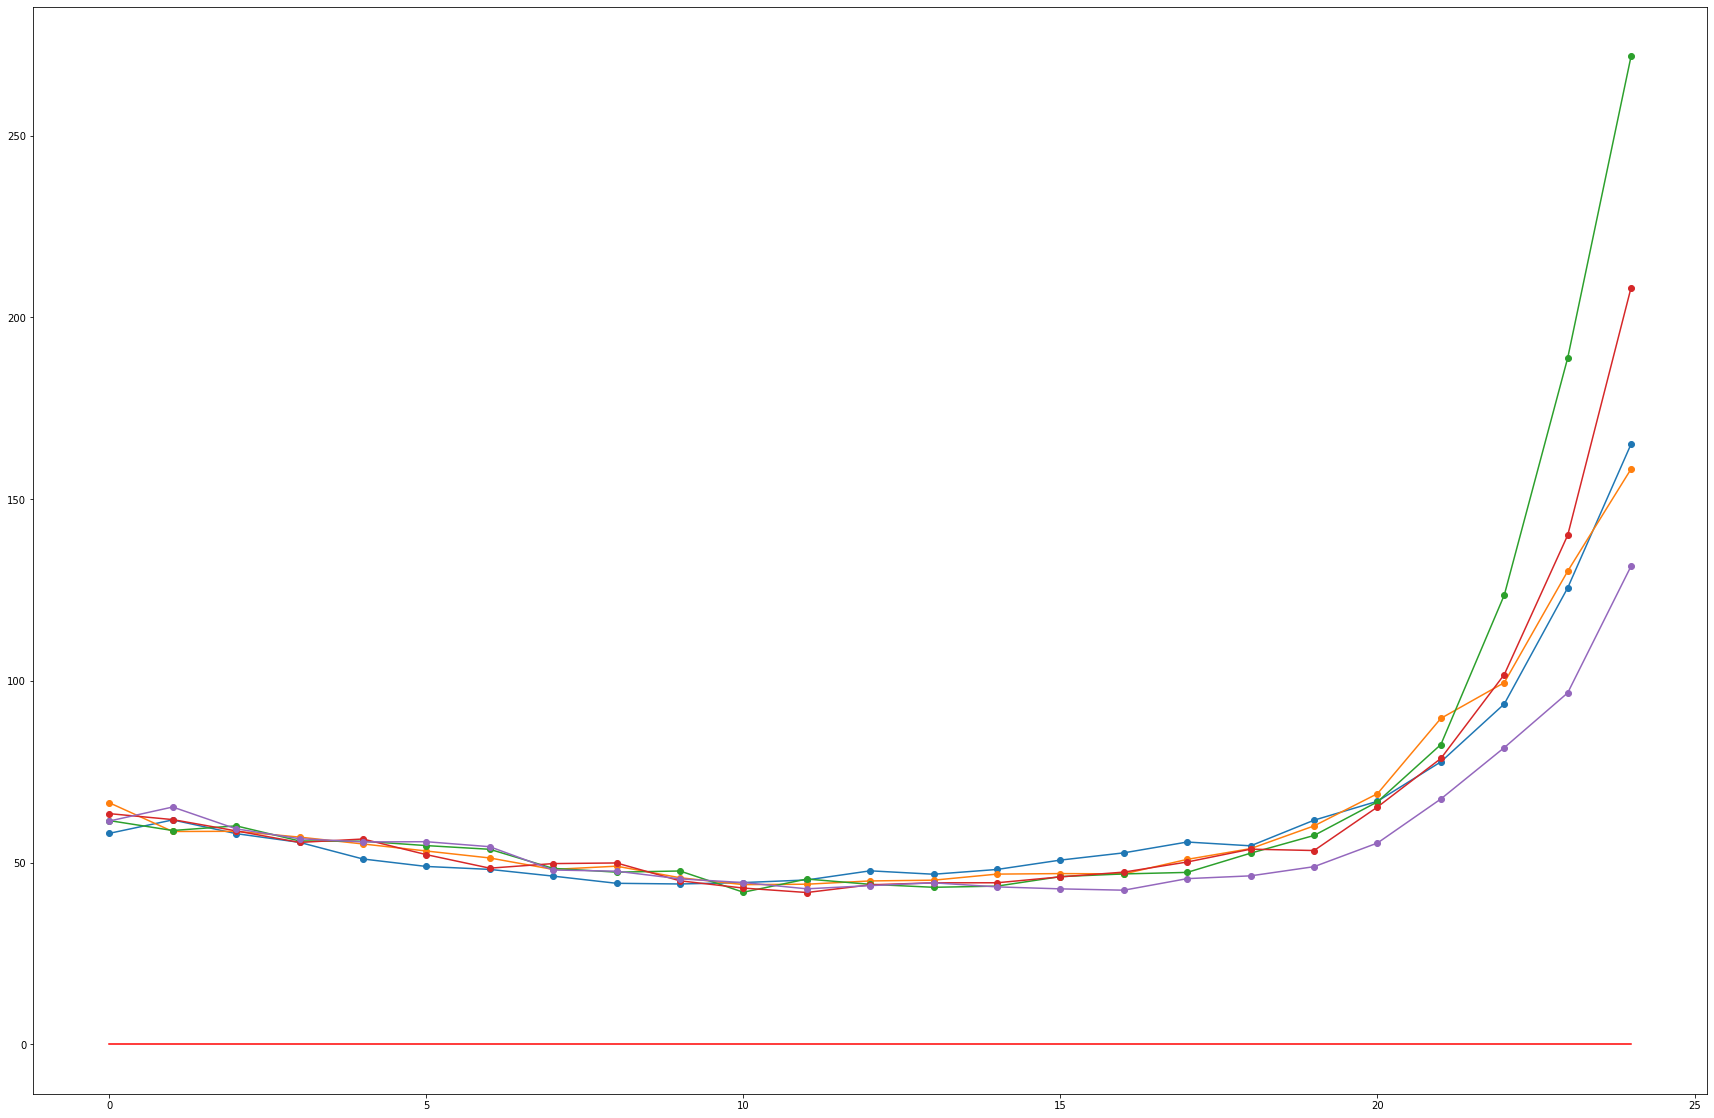

In [5]:
pl.plot_generates(TUR_log["TUR_lhs"],generate_num=generate_num)

0:tflatten(torch.ones(x.shape.cuda(


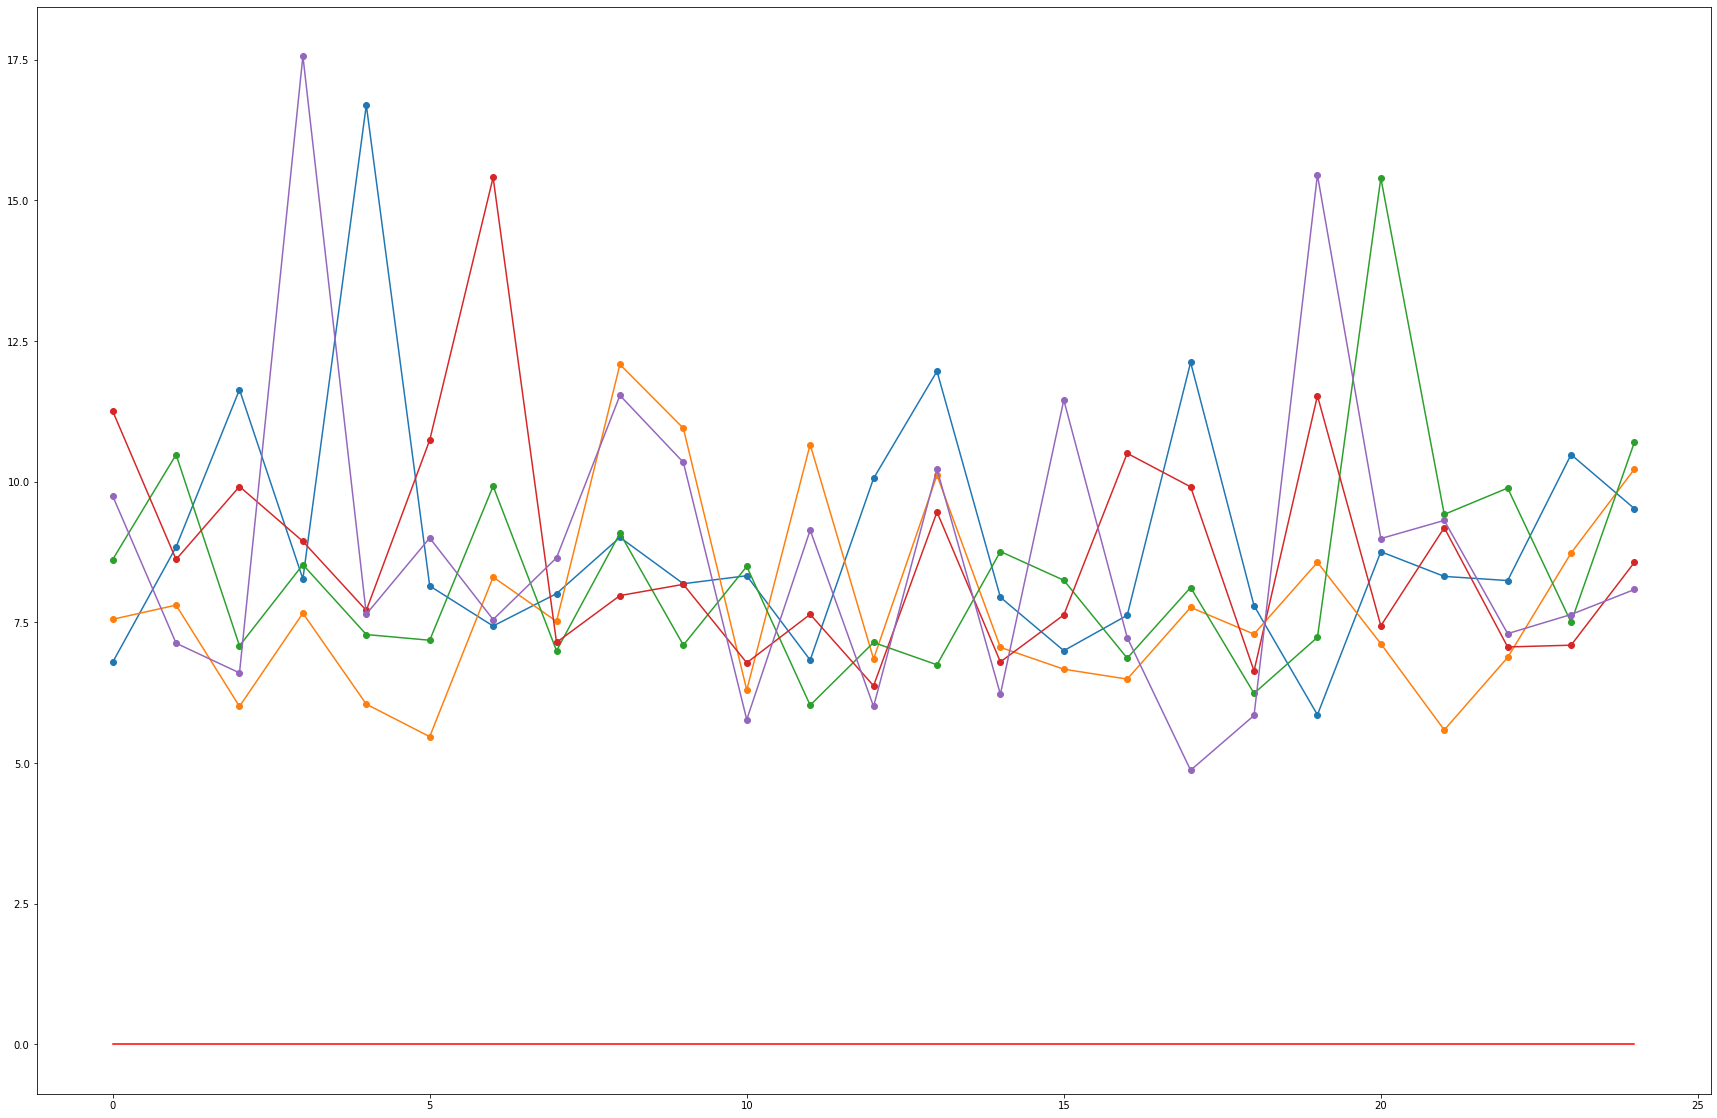

1:xf@


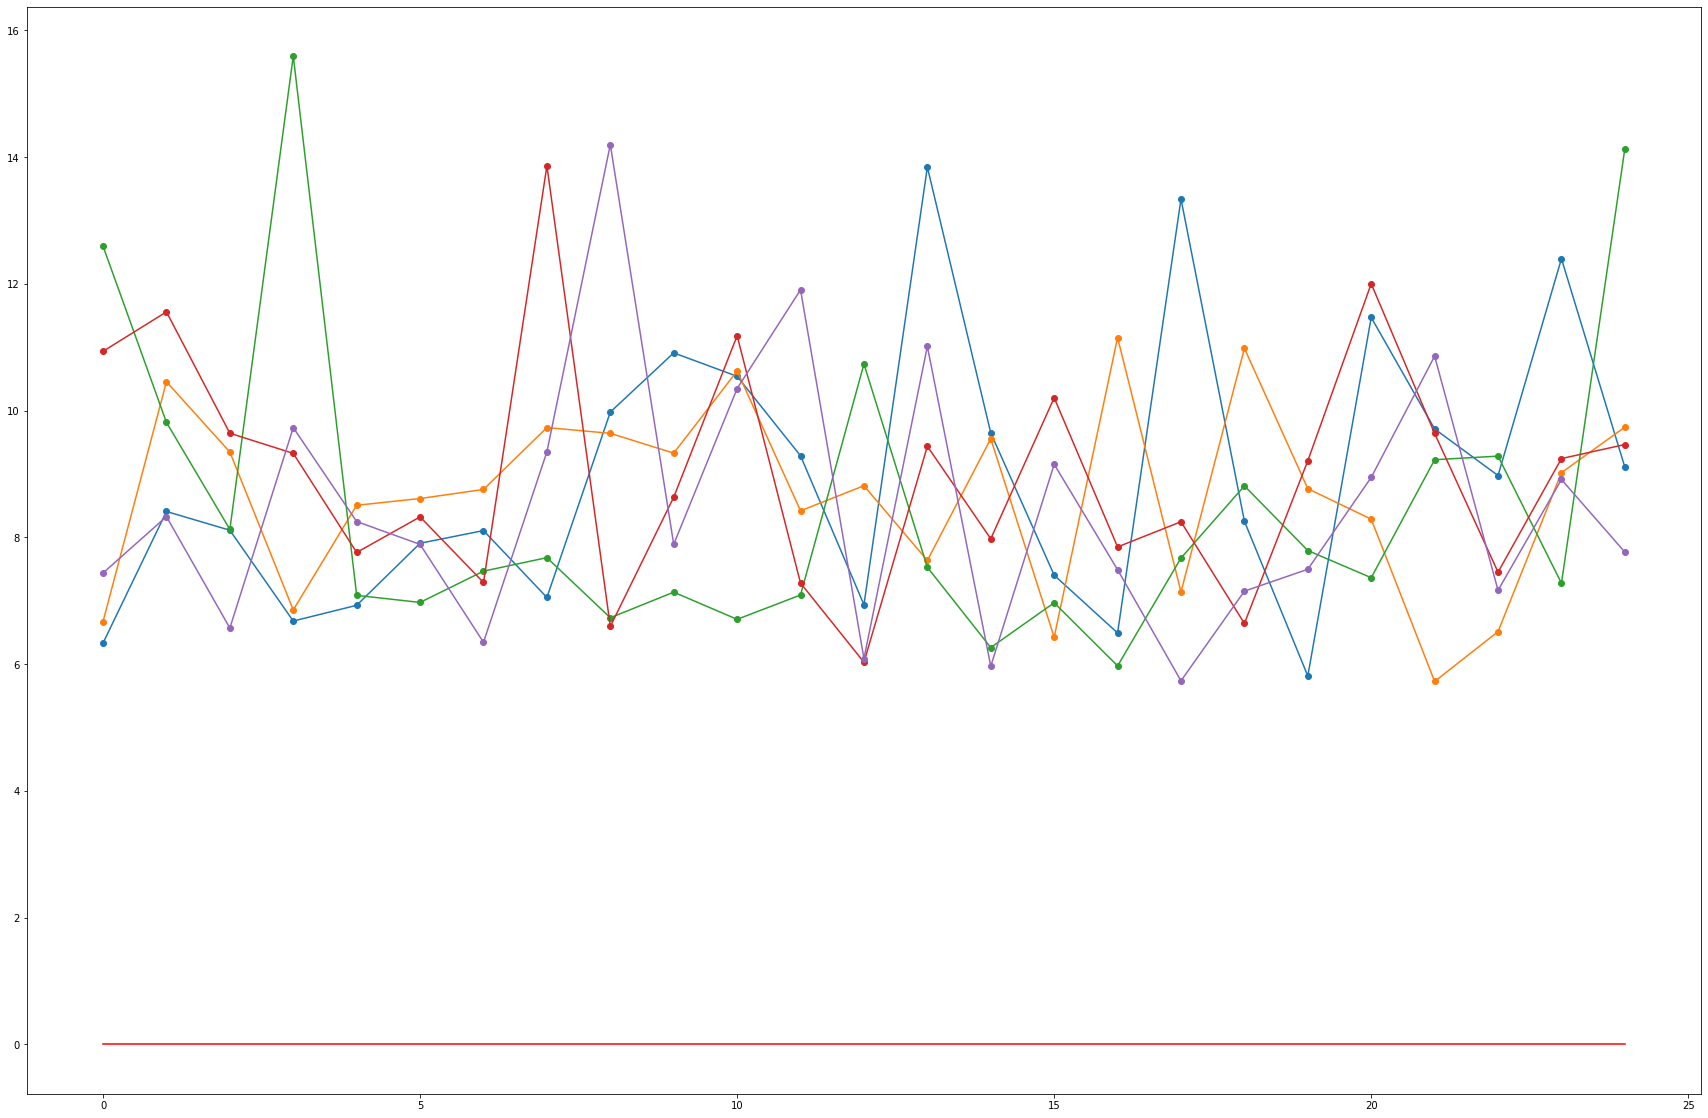

2:-xf2@


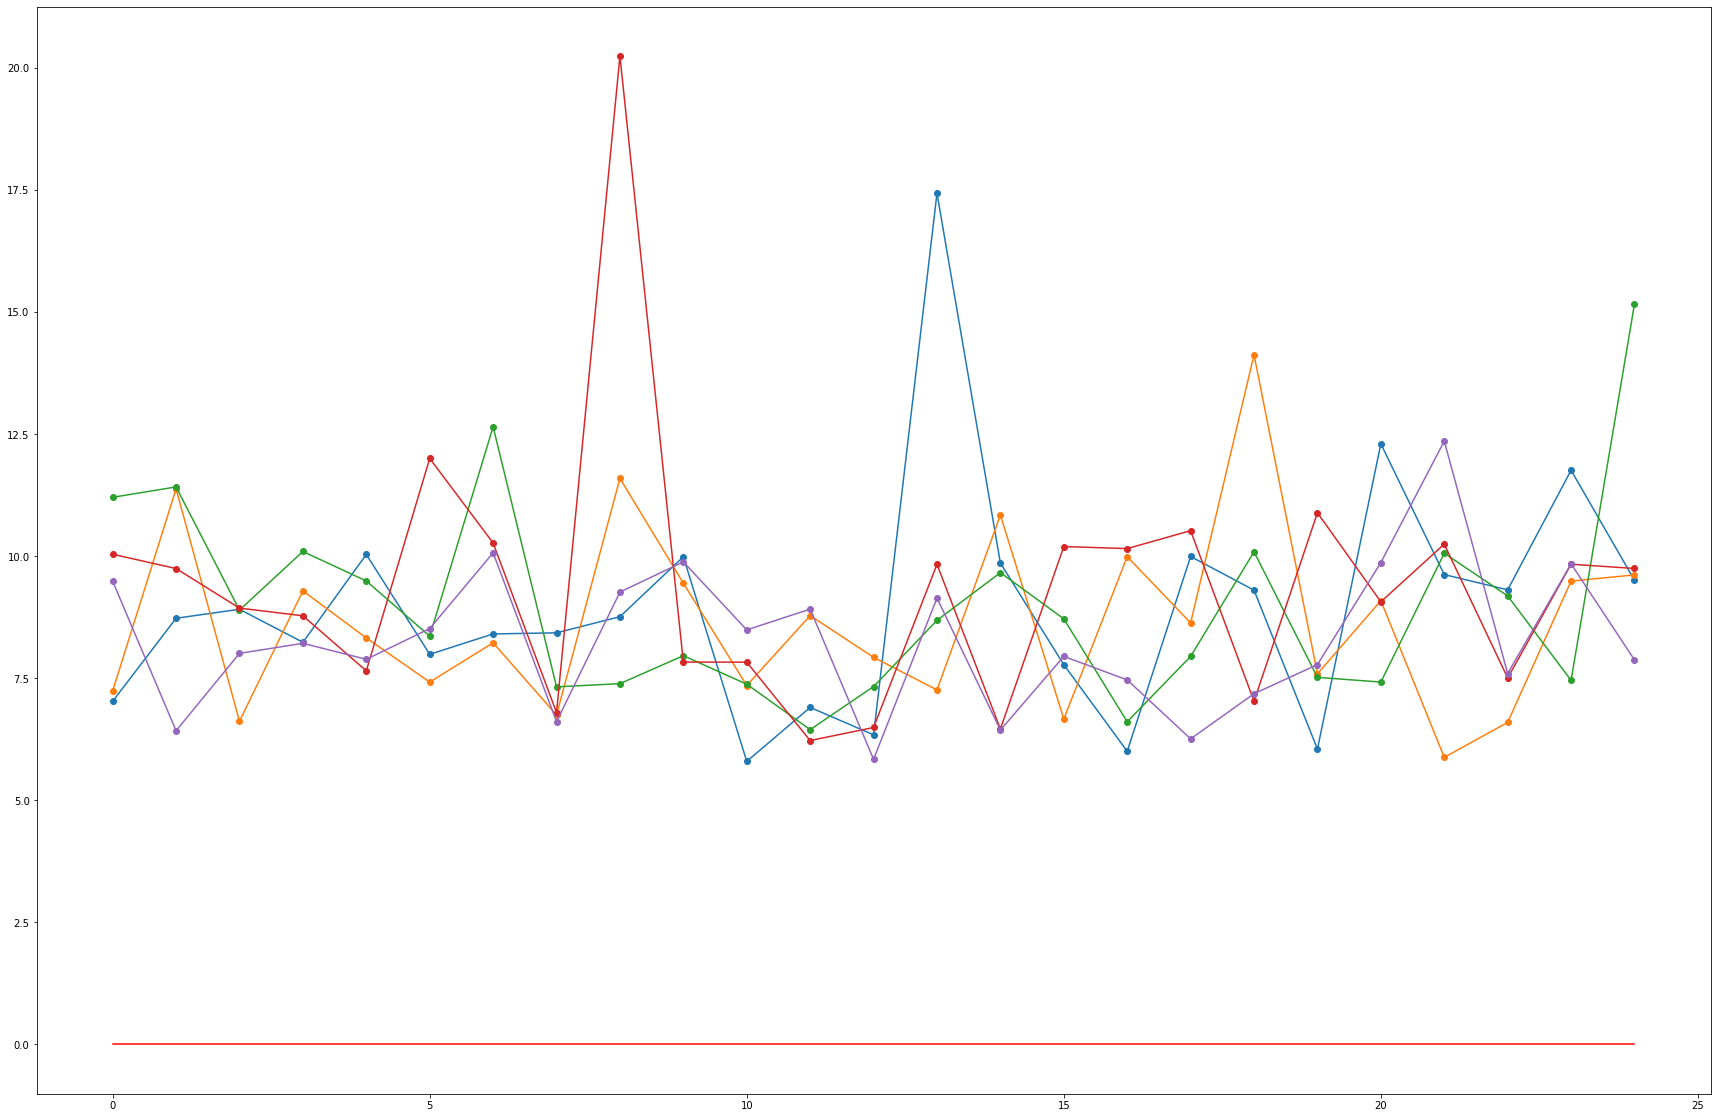

3:x@


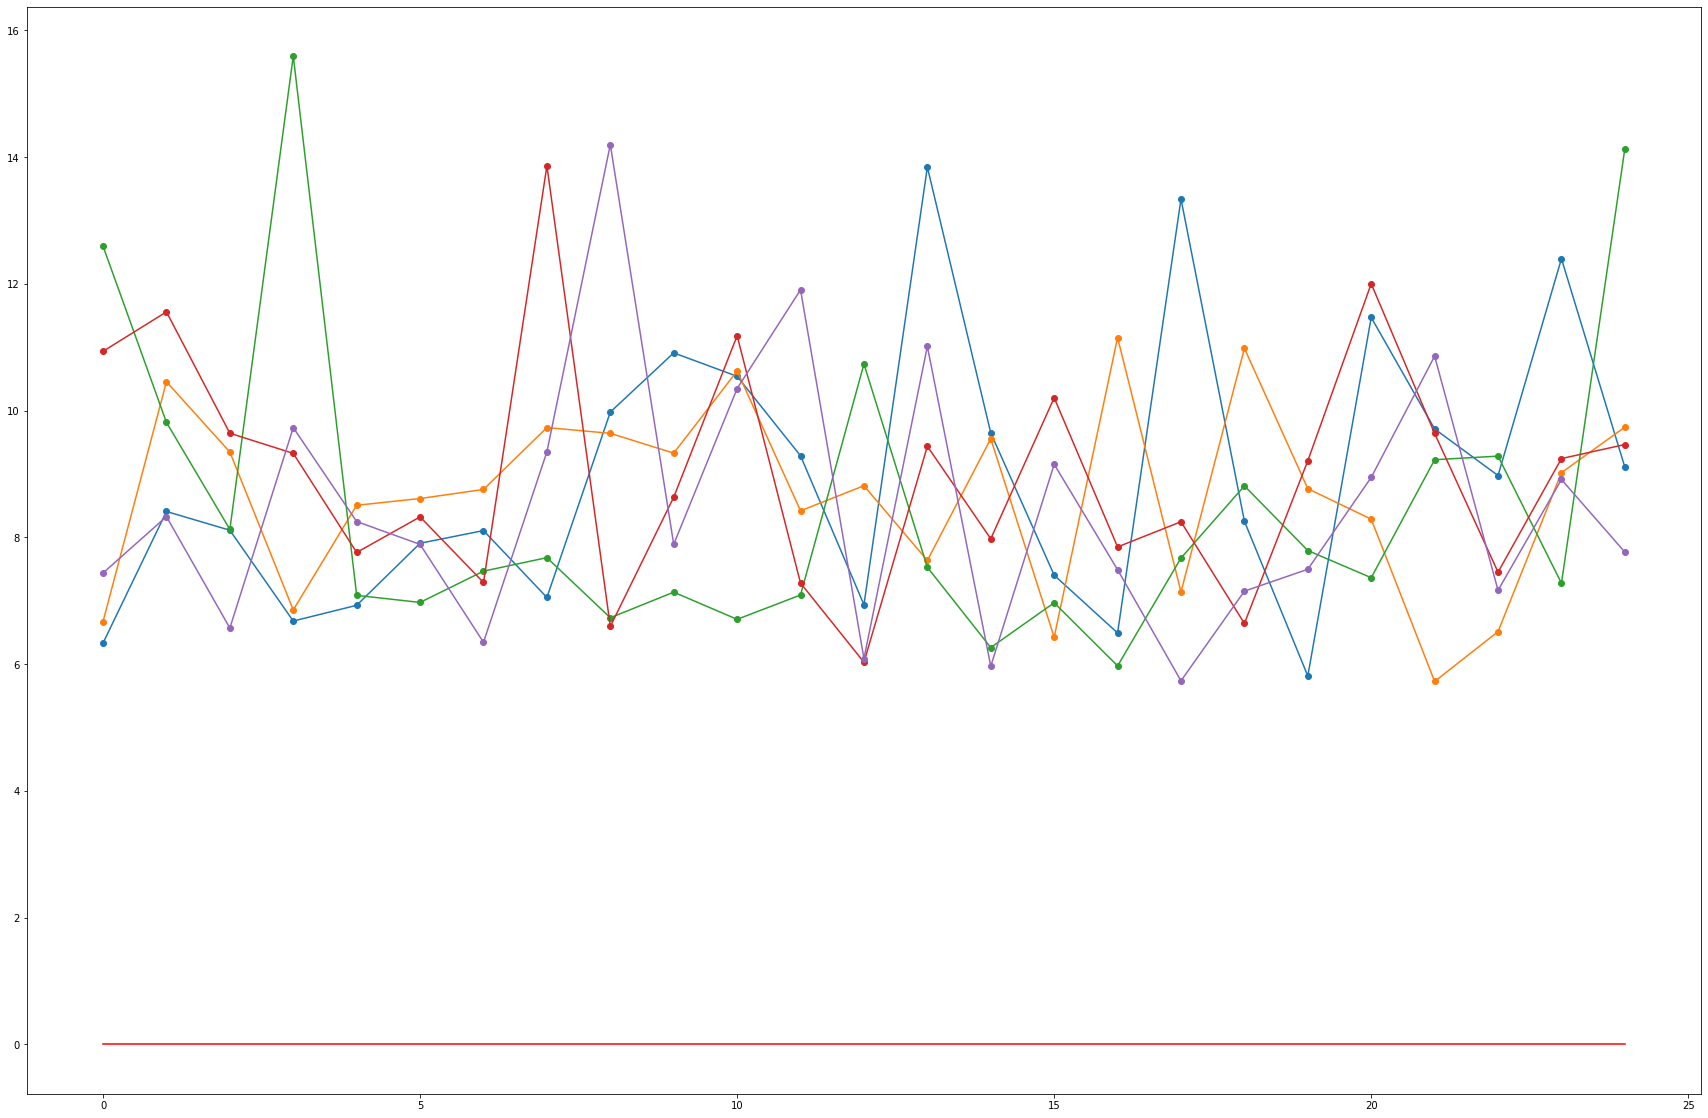

4:x2@


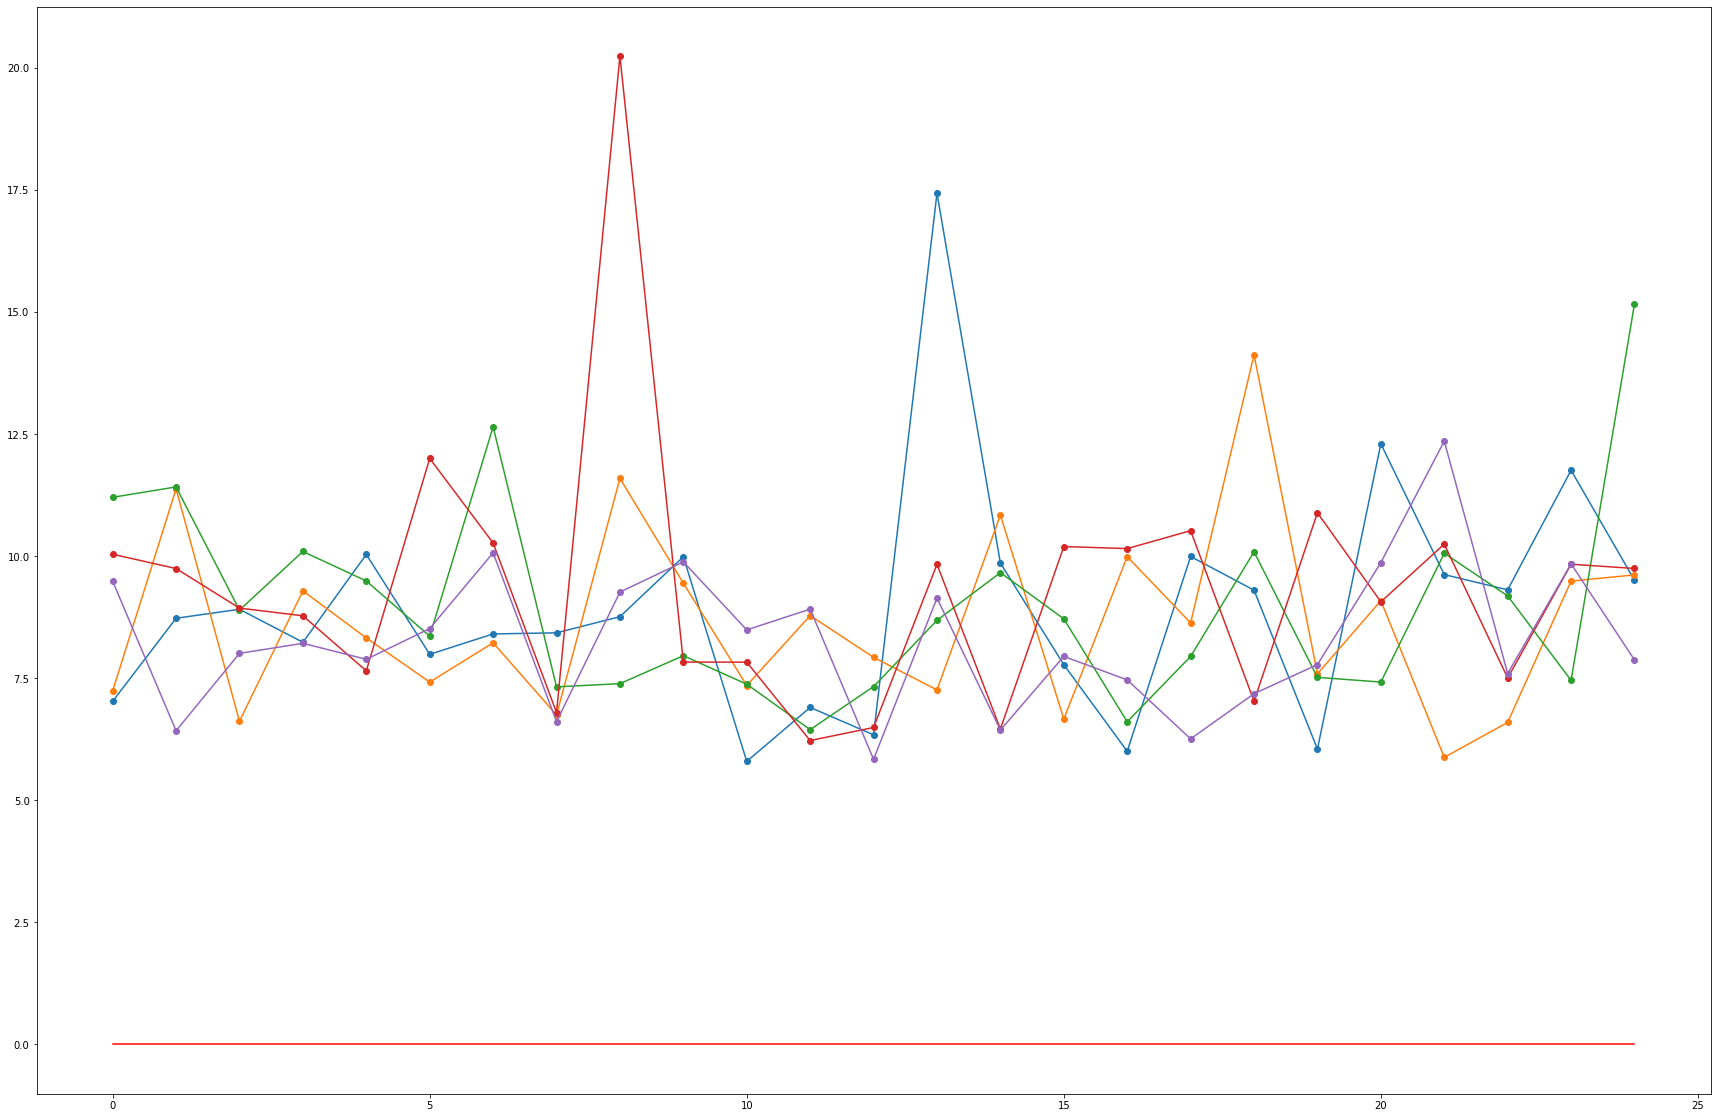

5:F


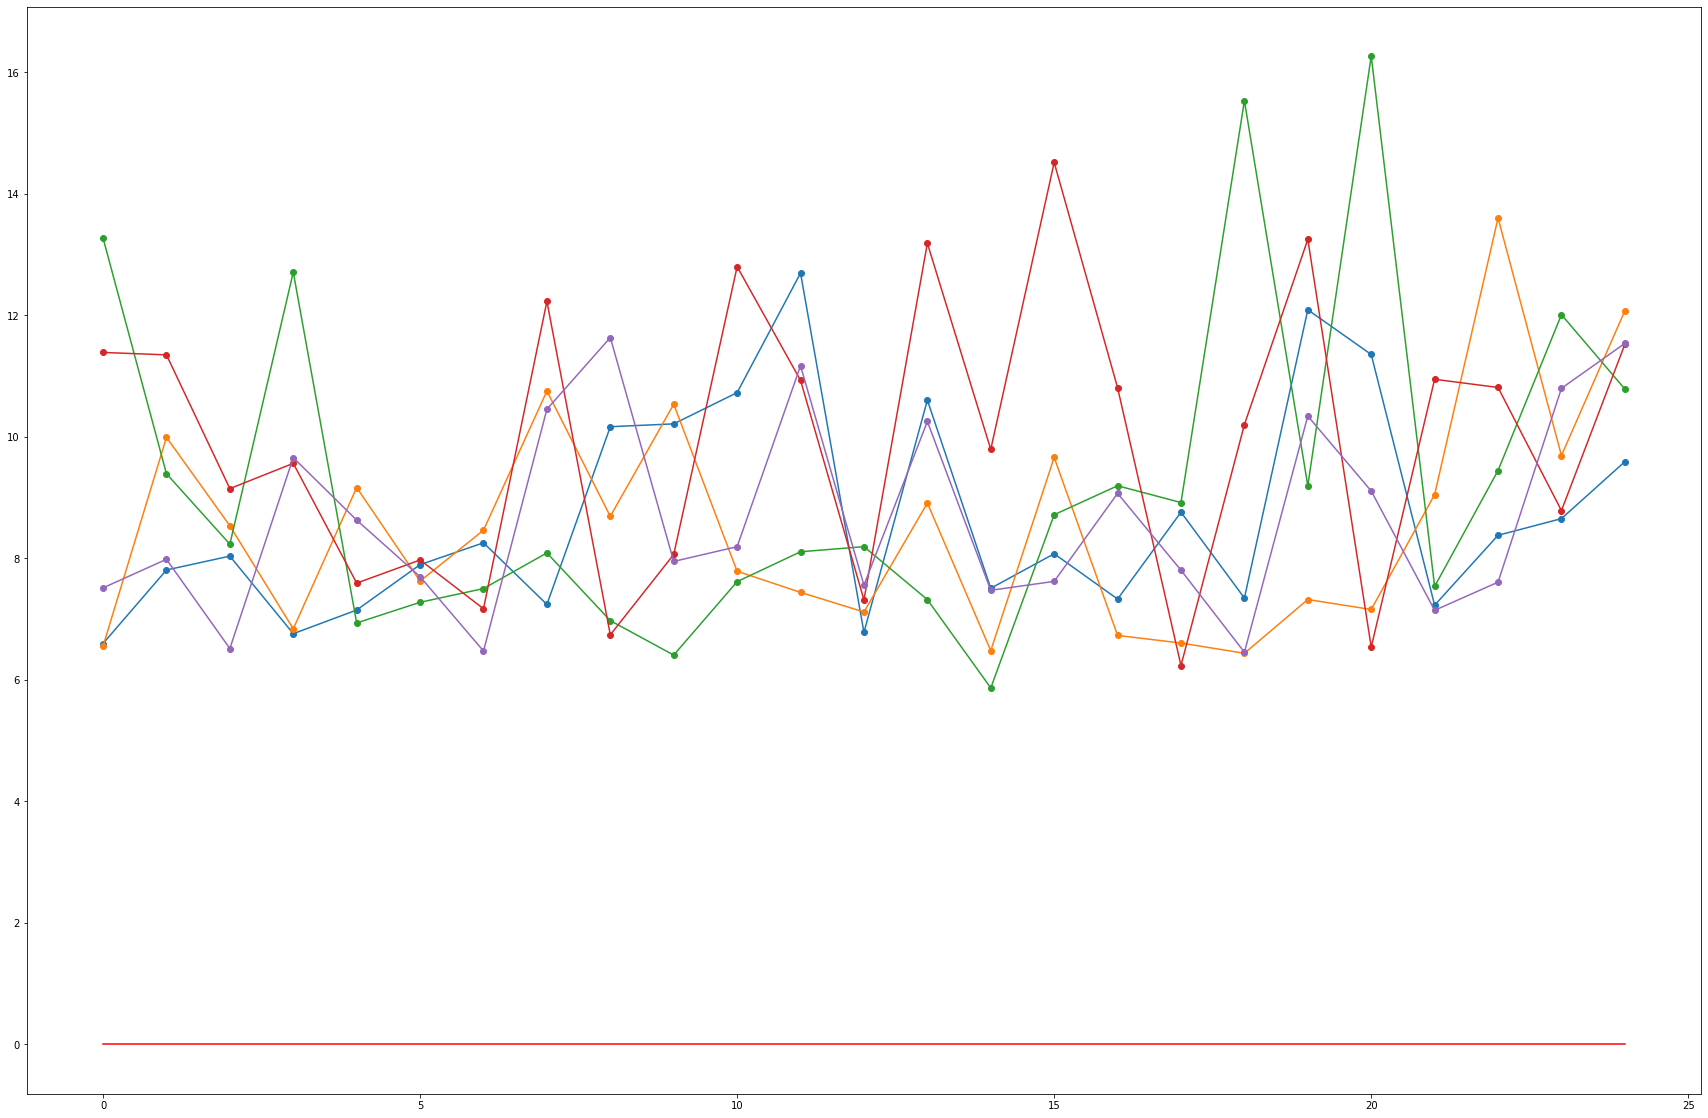

In [6]:
for i in range(6):
    print(str(i)+":"+funcs[i])
    pl.plot_generates_log(TUR_log["TUR_lhs"]/TUR_log["rhs."+str(i)],generate_num=generate_num)
    plt.show()

0:tflatten(torch.ones(x.shape.cuda(


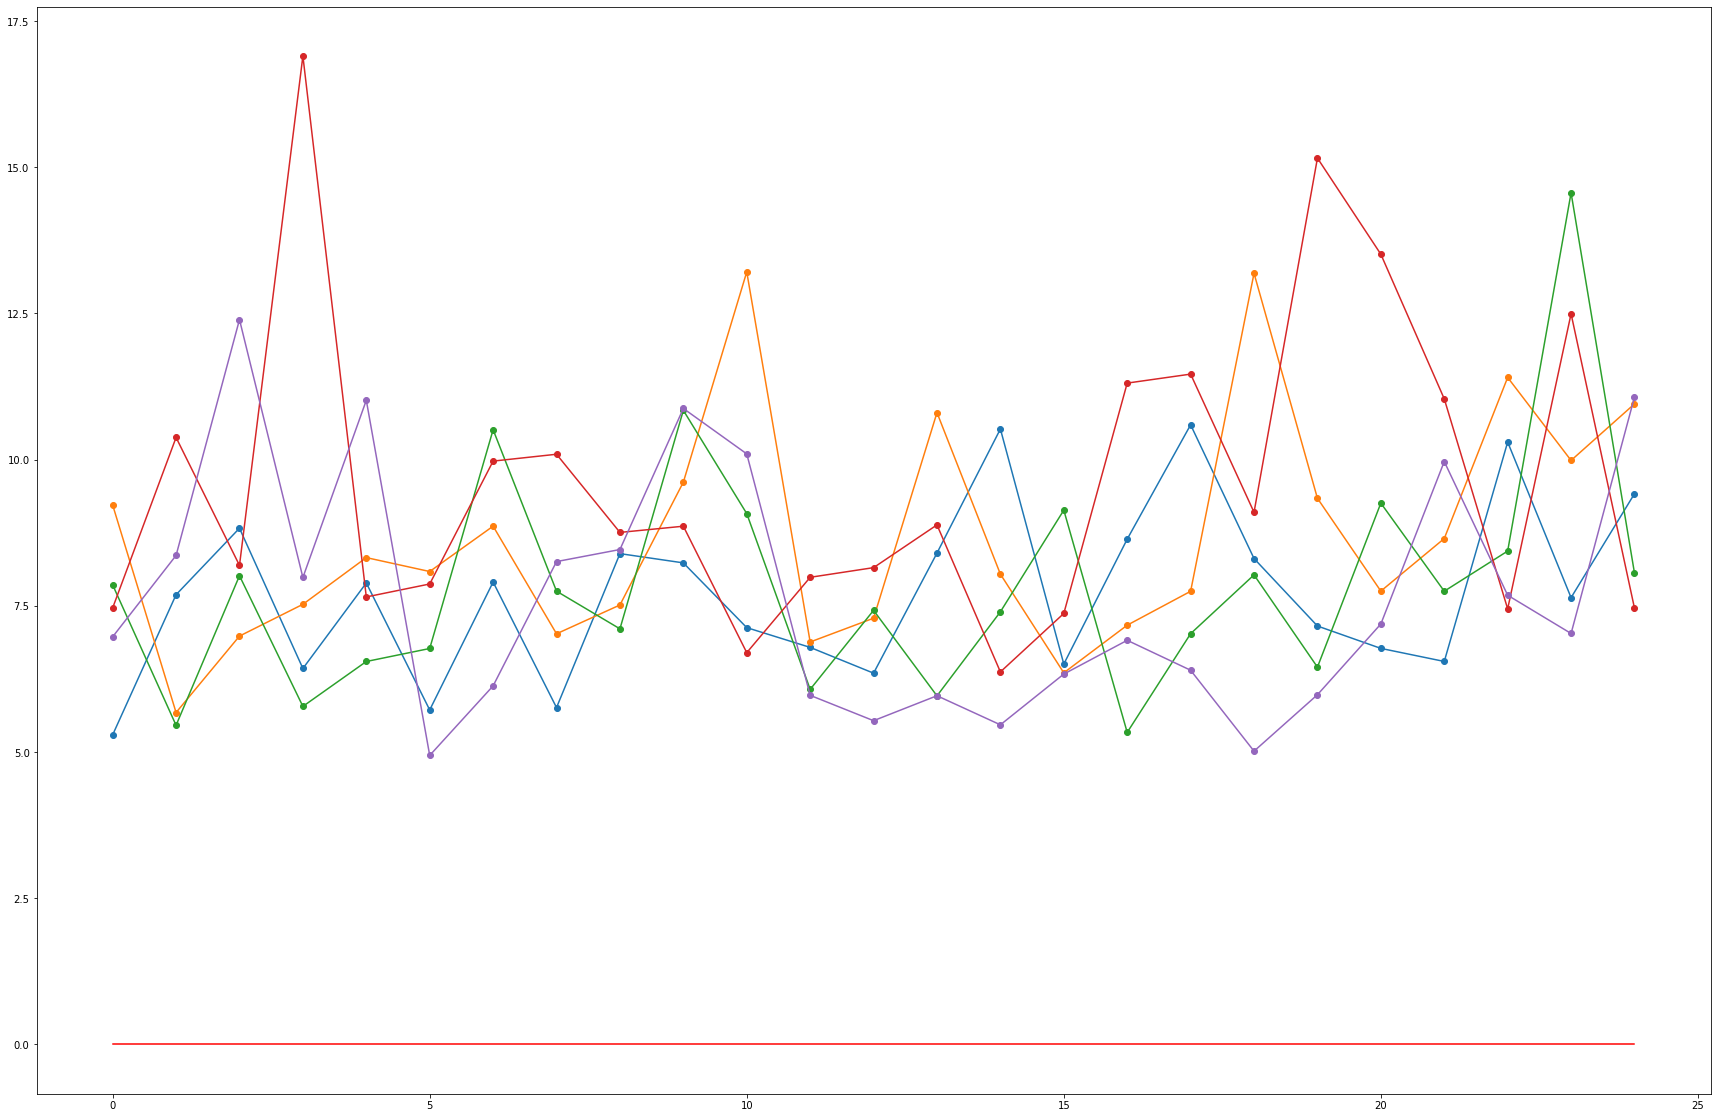

1:xf@


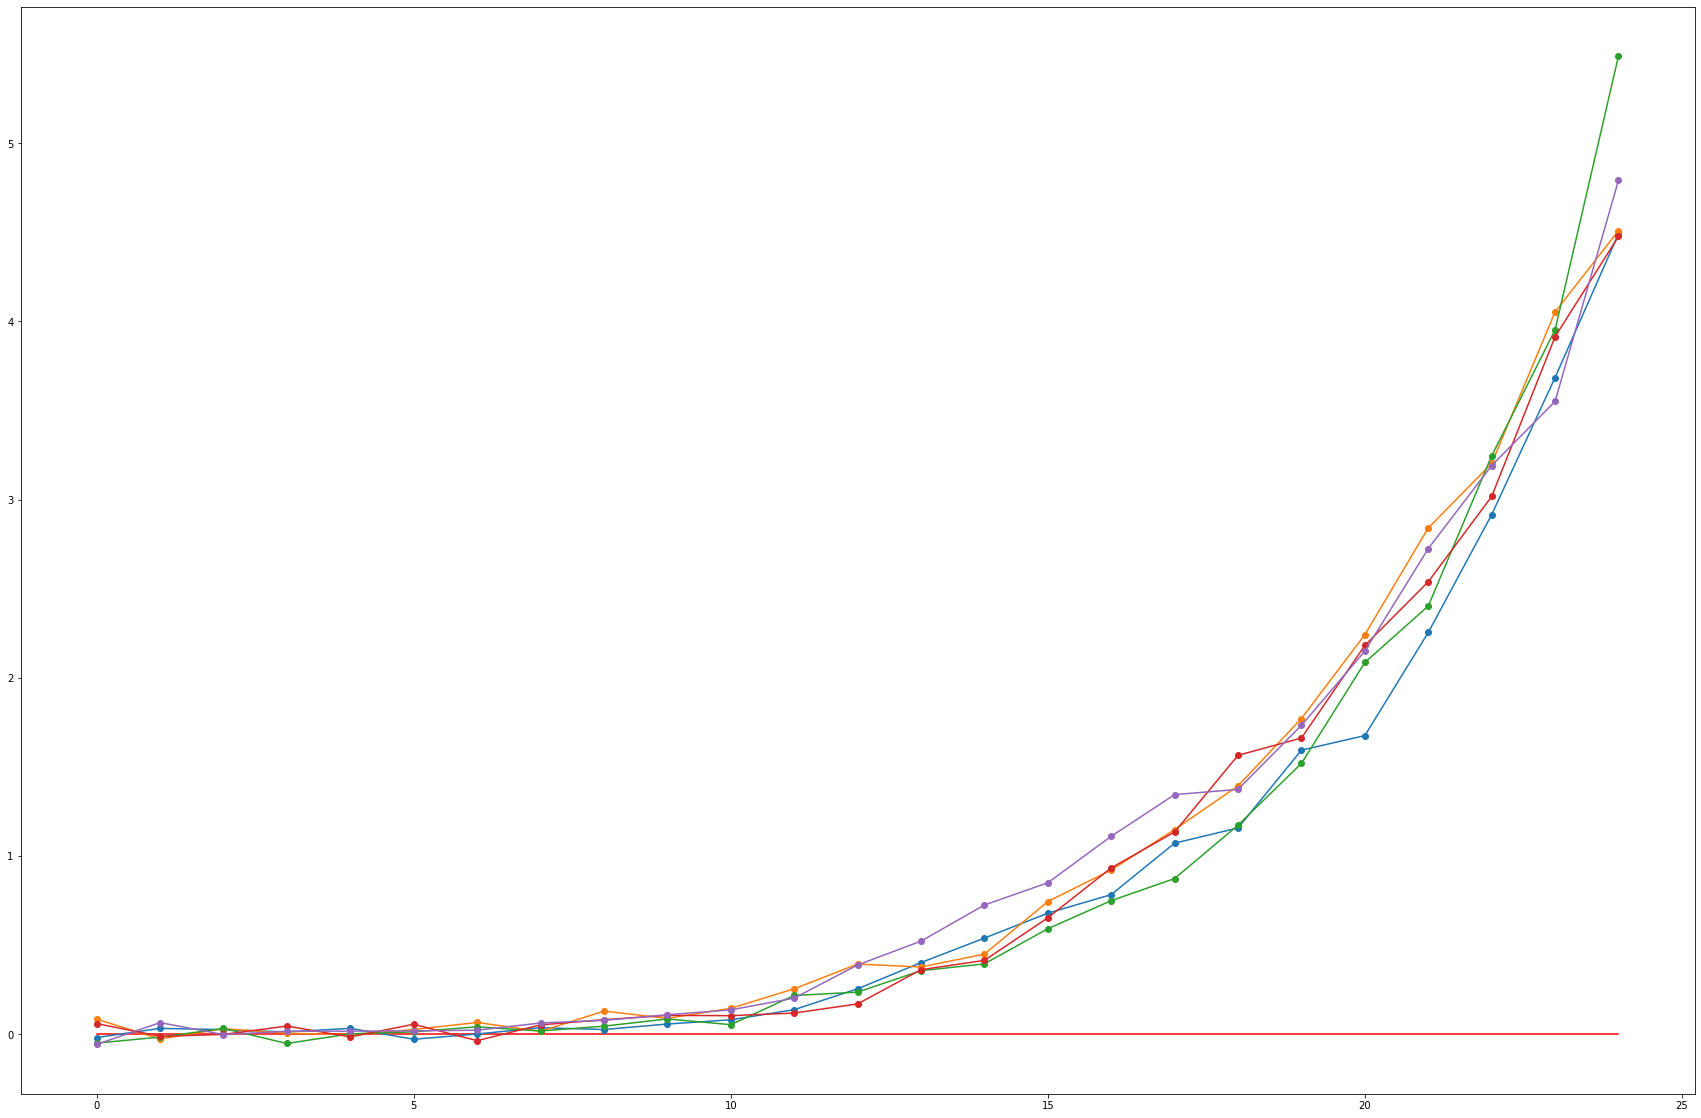

2:-xf2@


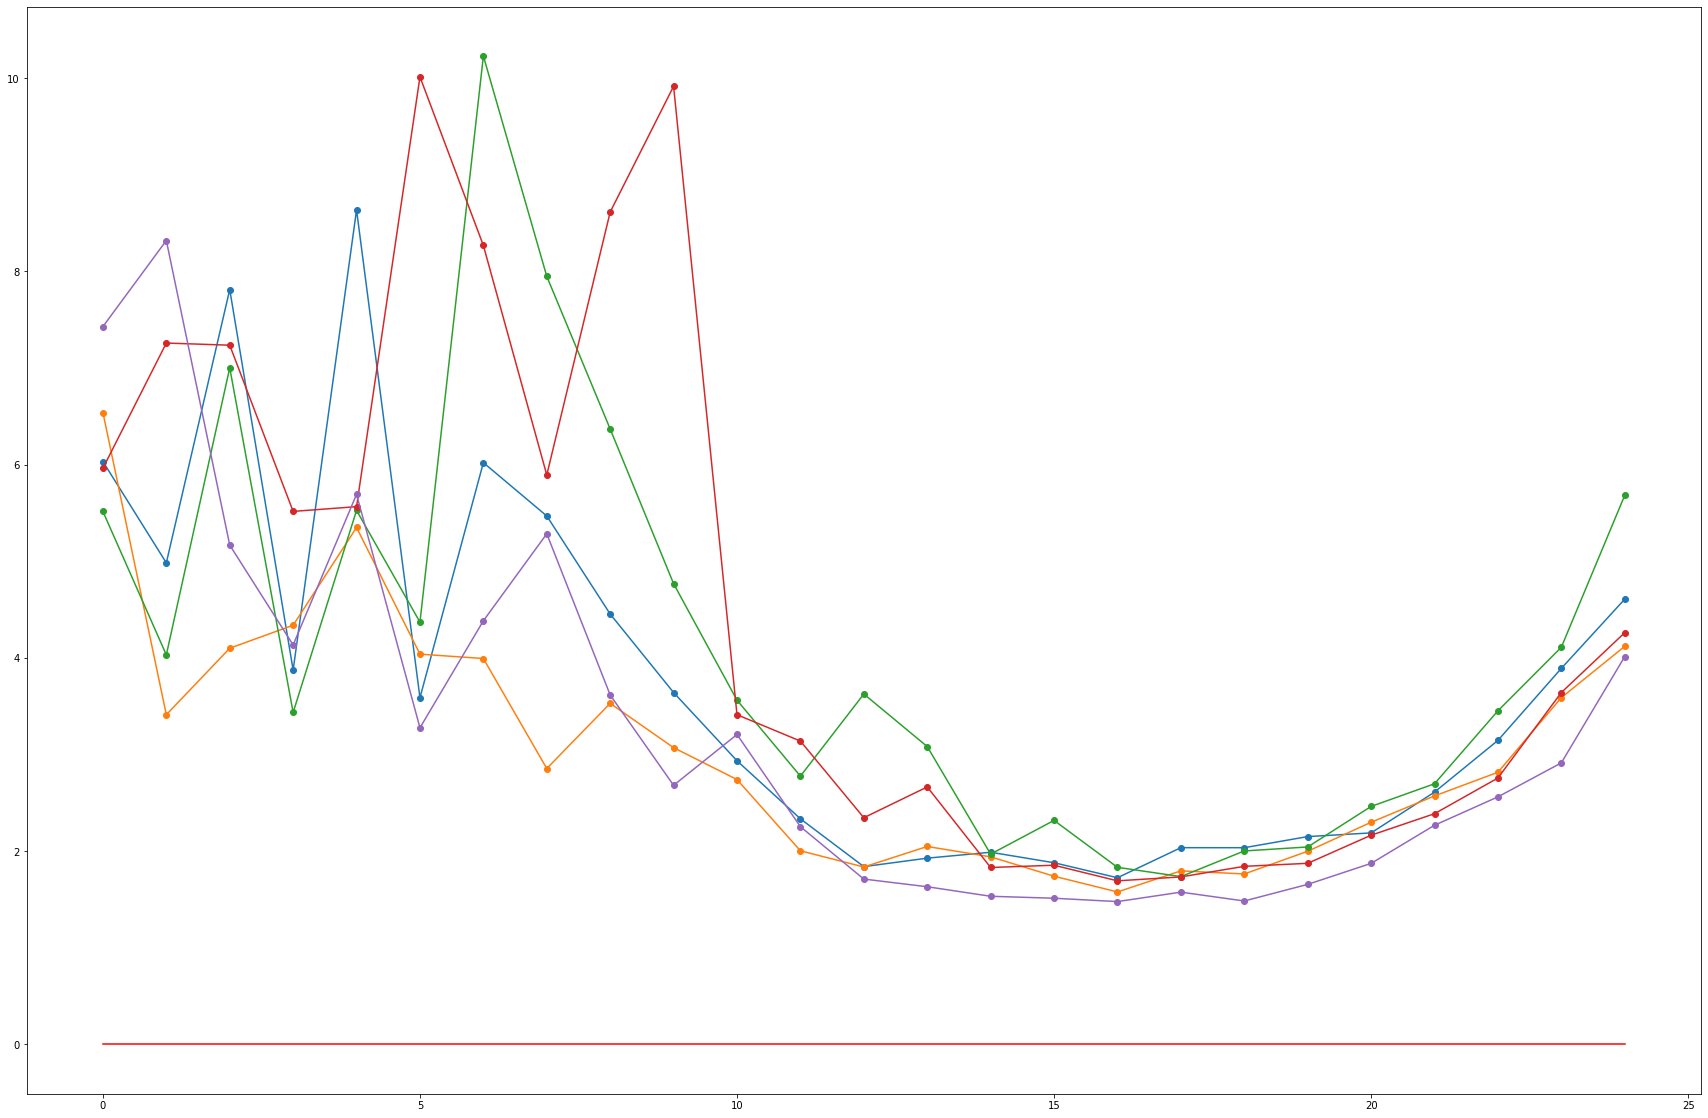

3:x@


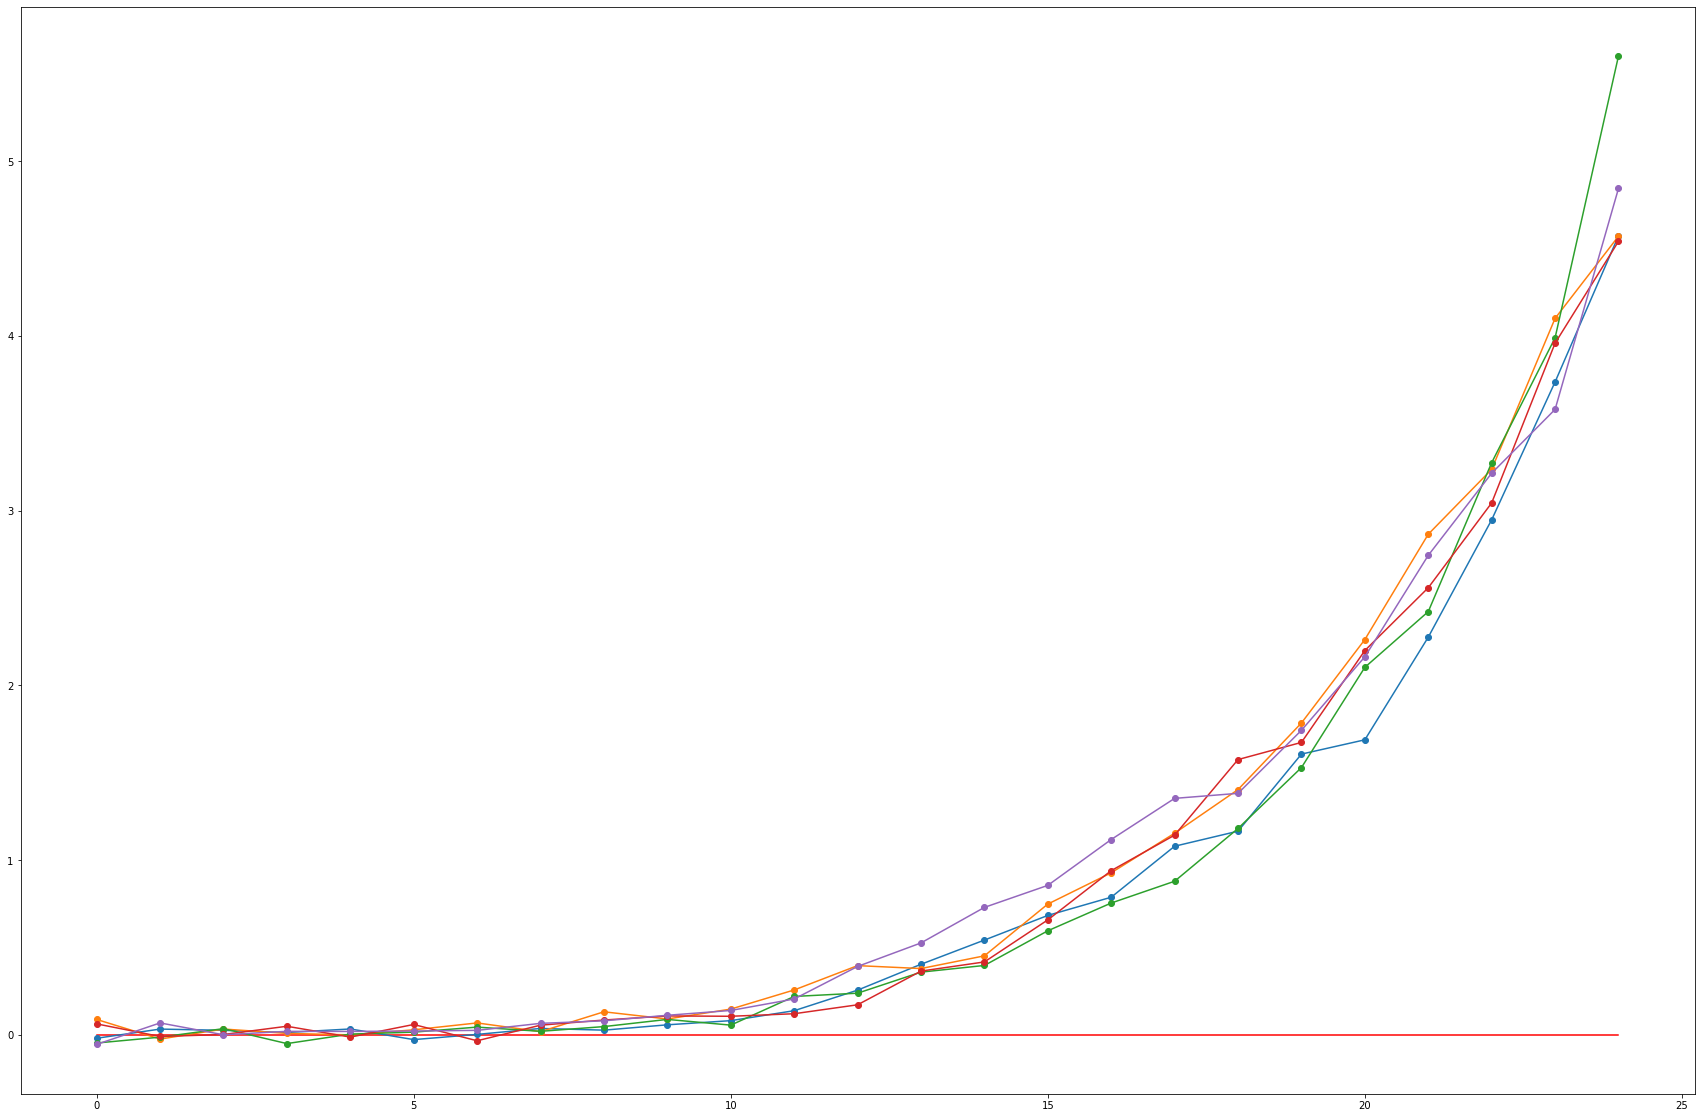

4:x2@


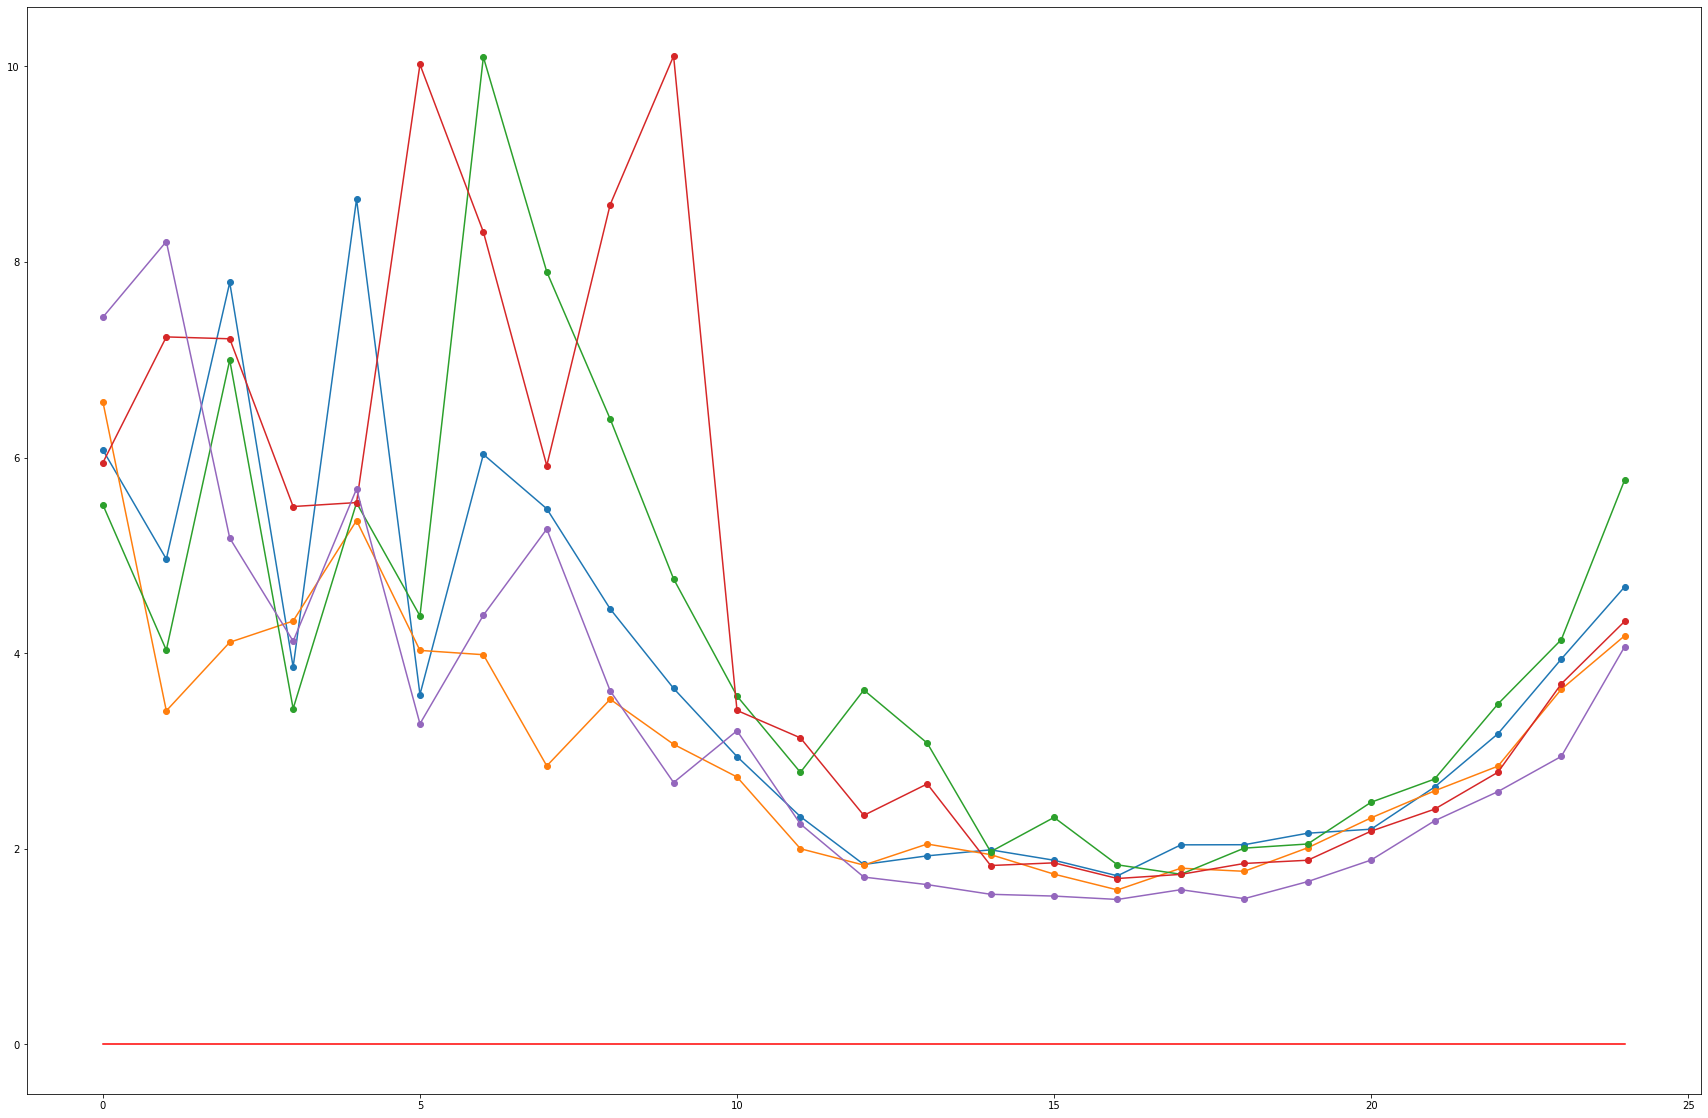

5:F


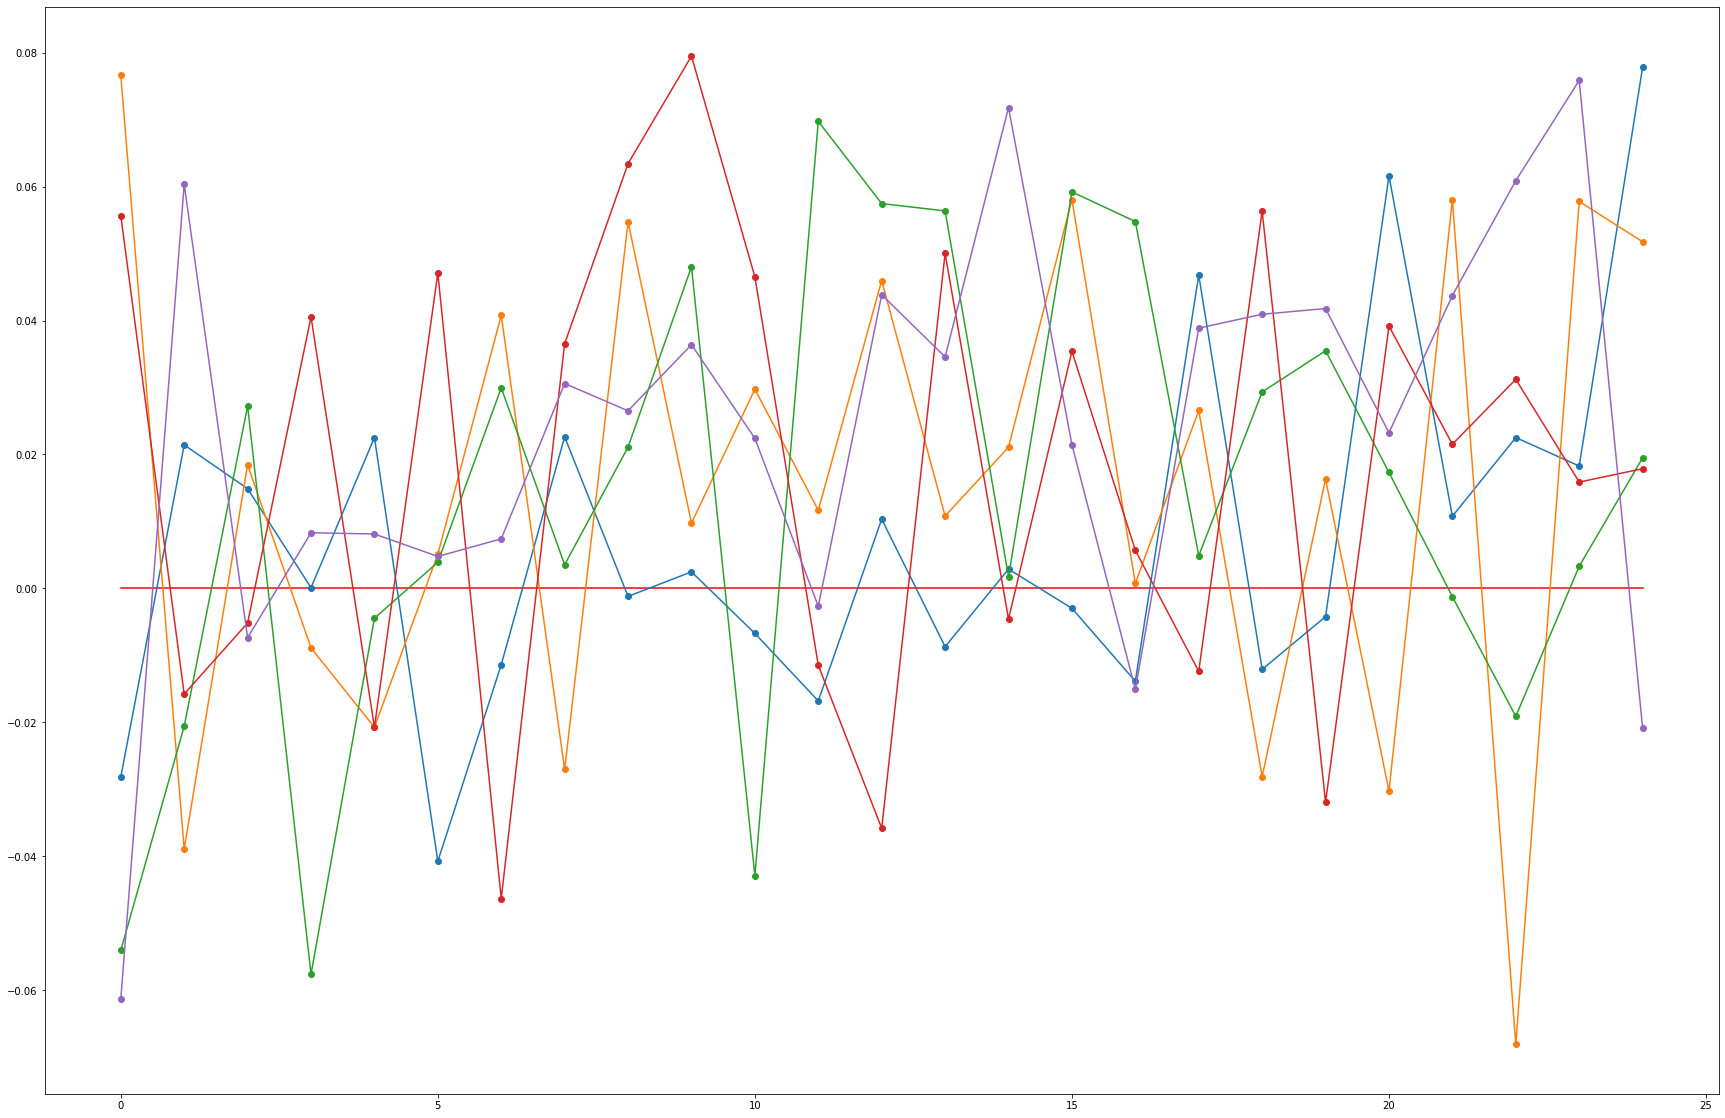

In [7]:
for i in range(6):
    print(str(i)+":"+funcs[i])
    pl.plot_generates_log(TUR_log["TUR_lhs"]/TUR_log["rhsA(F)."+str(i)],generate_num=generate_num)
    plt.show()

# 異なるサンプル手法A,B,Vの比較

## V/A

0:tflatten(torch.ones(x.shape.cuda(


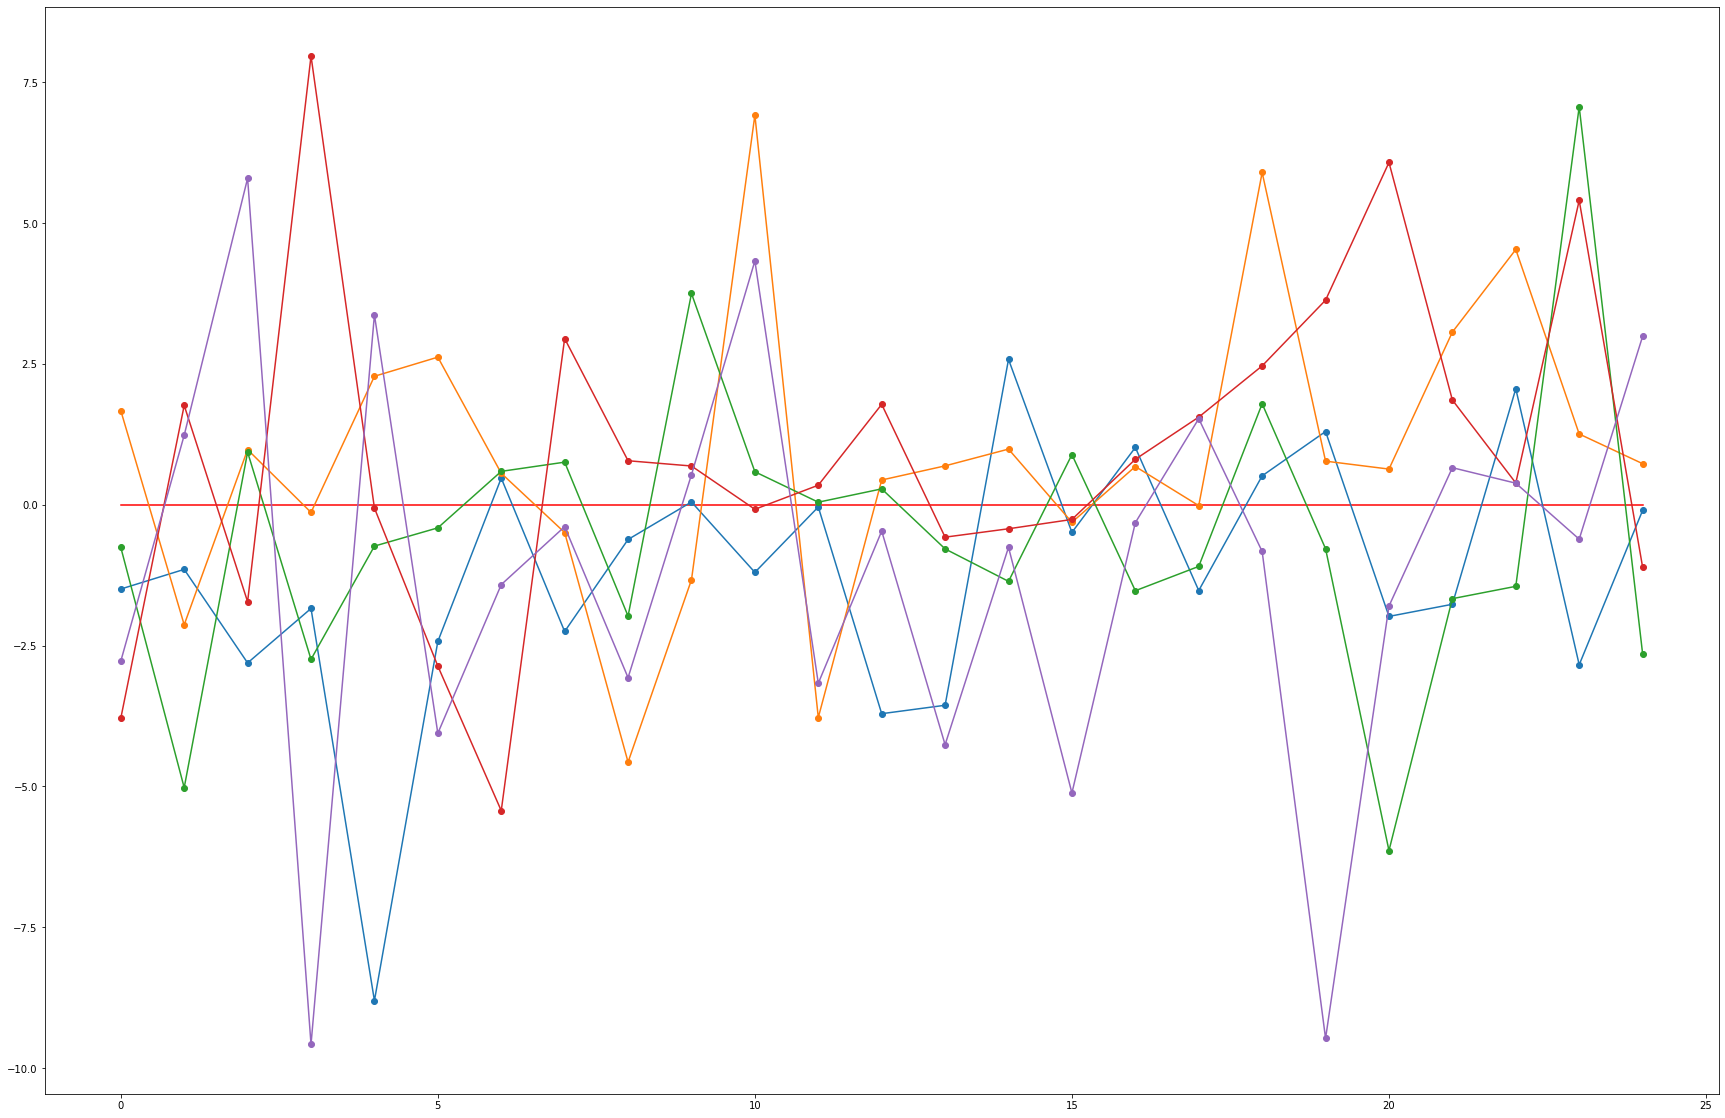

1:xf@


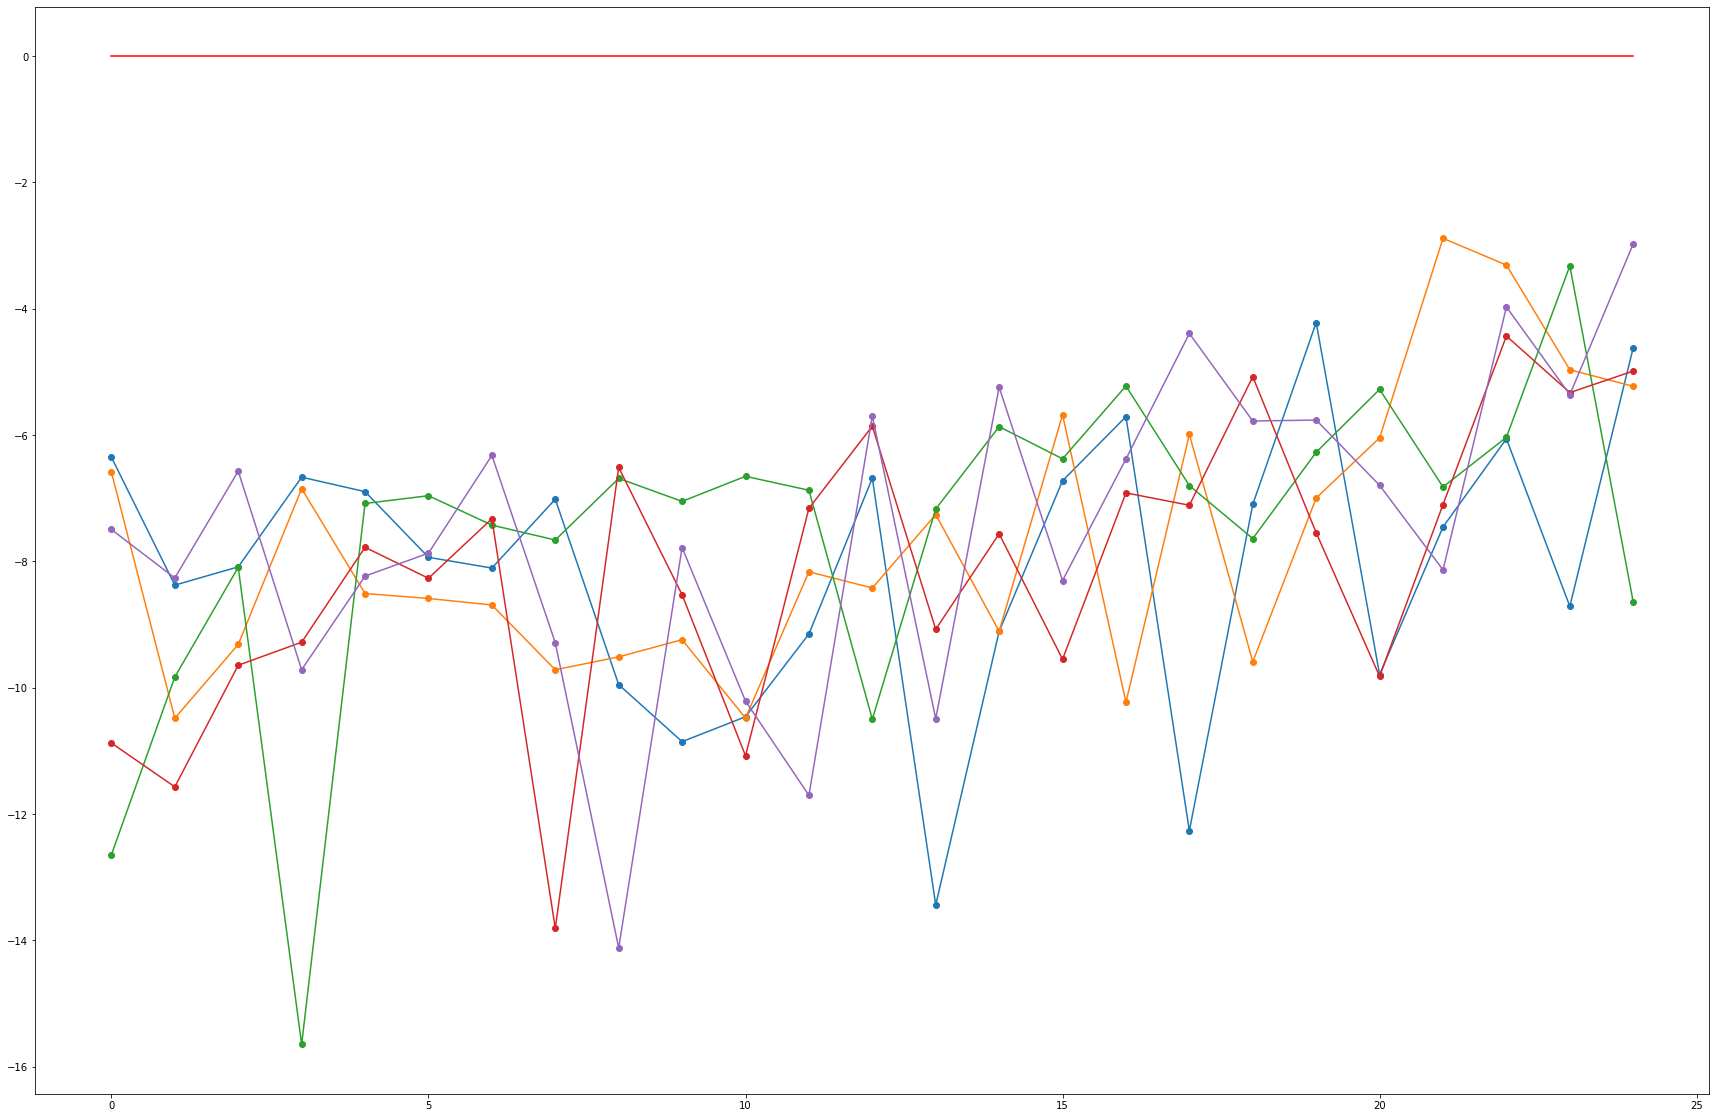

2:-xf2@


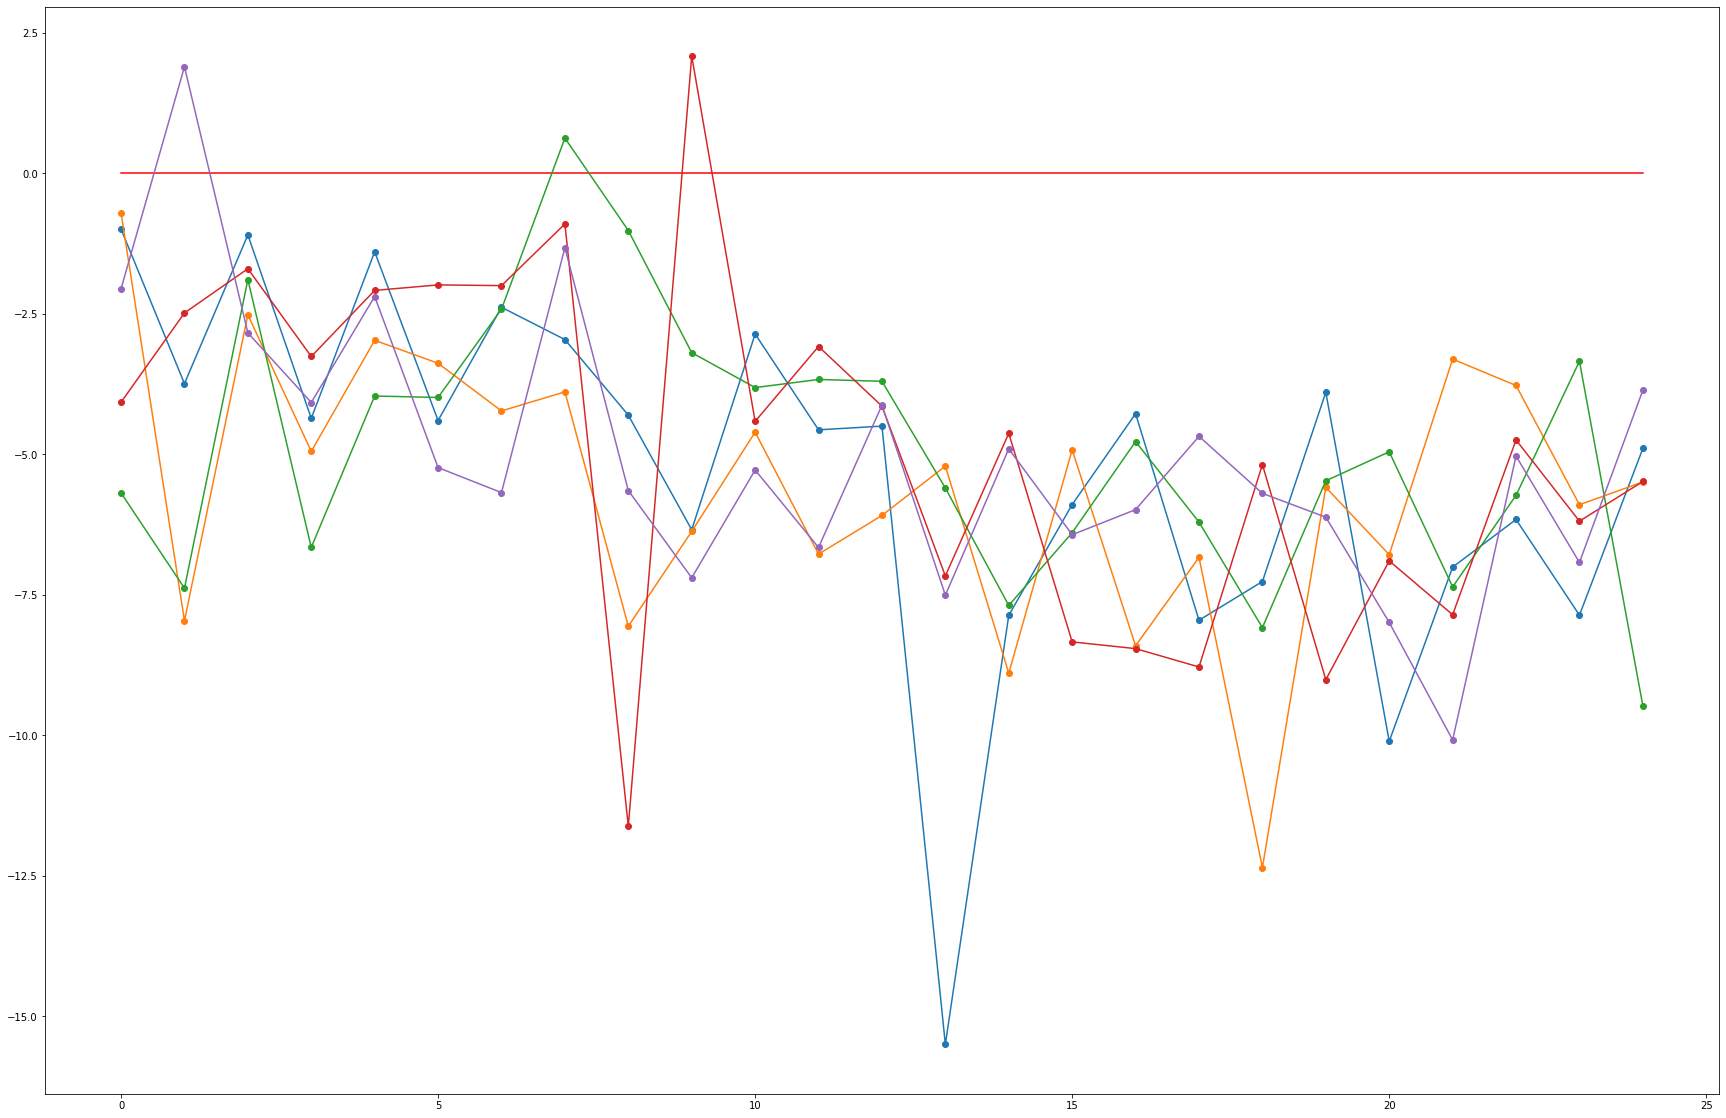

3:x@


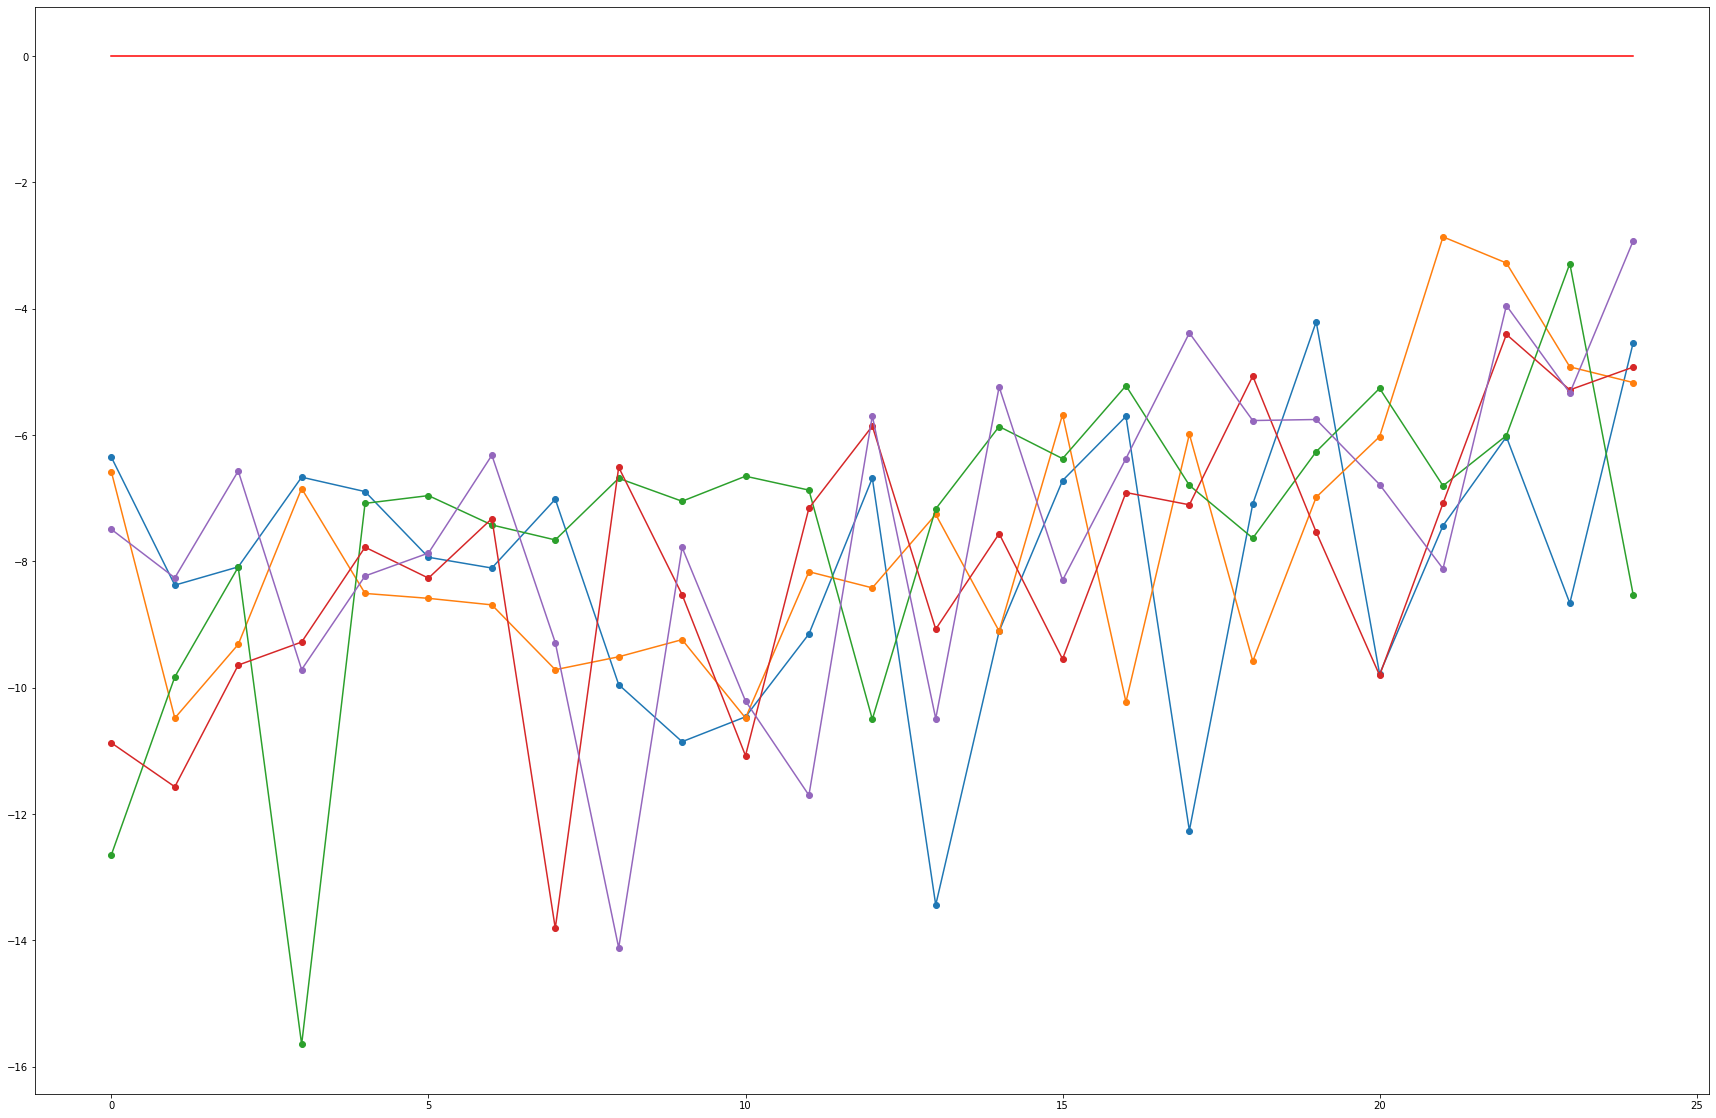

4:x2@


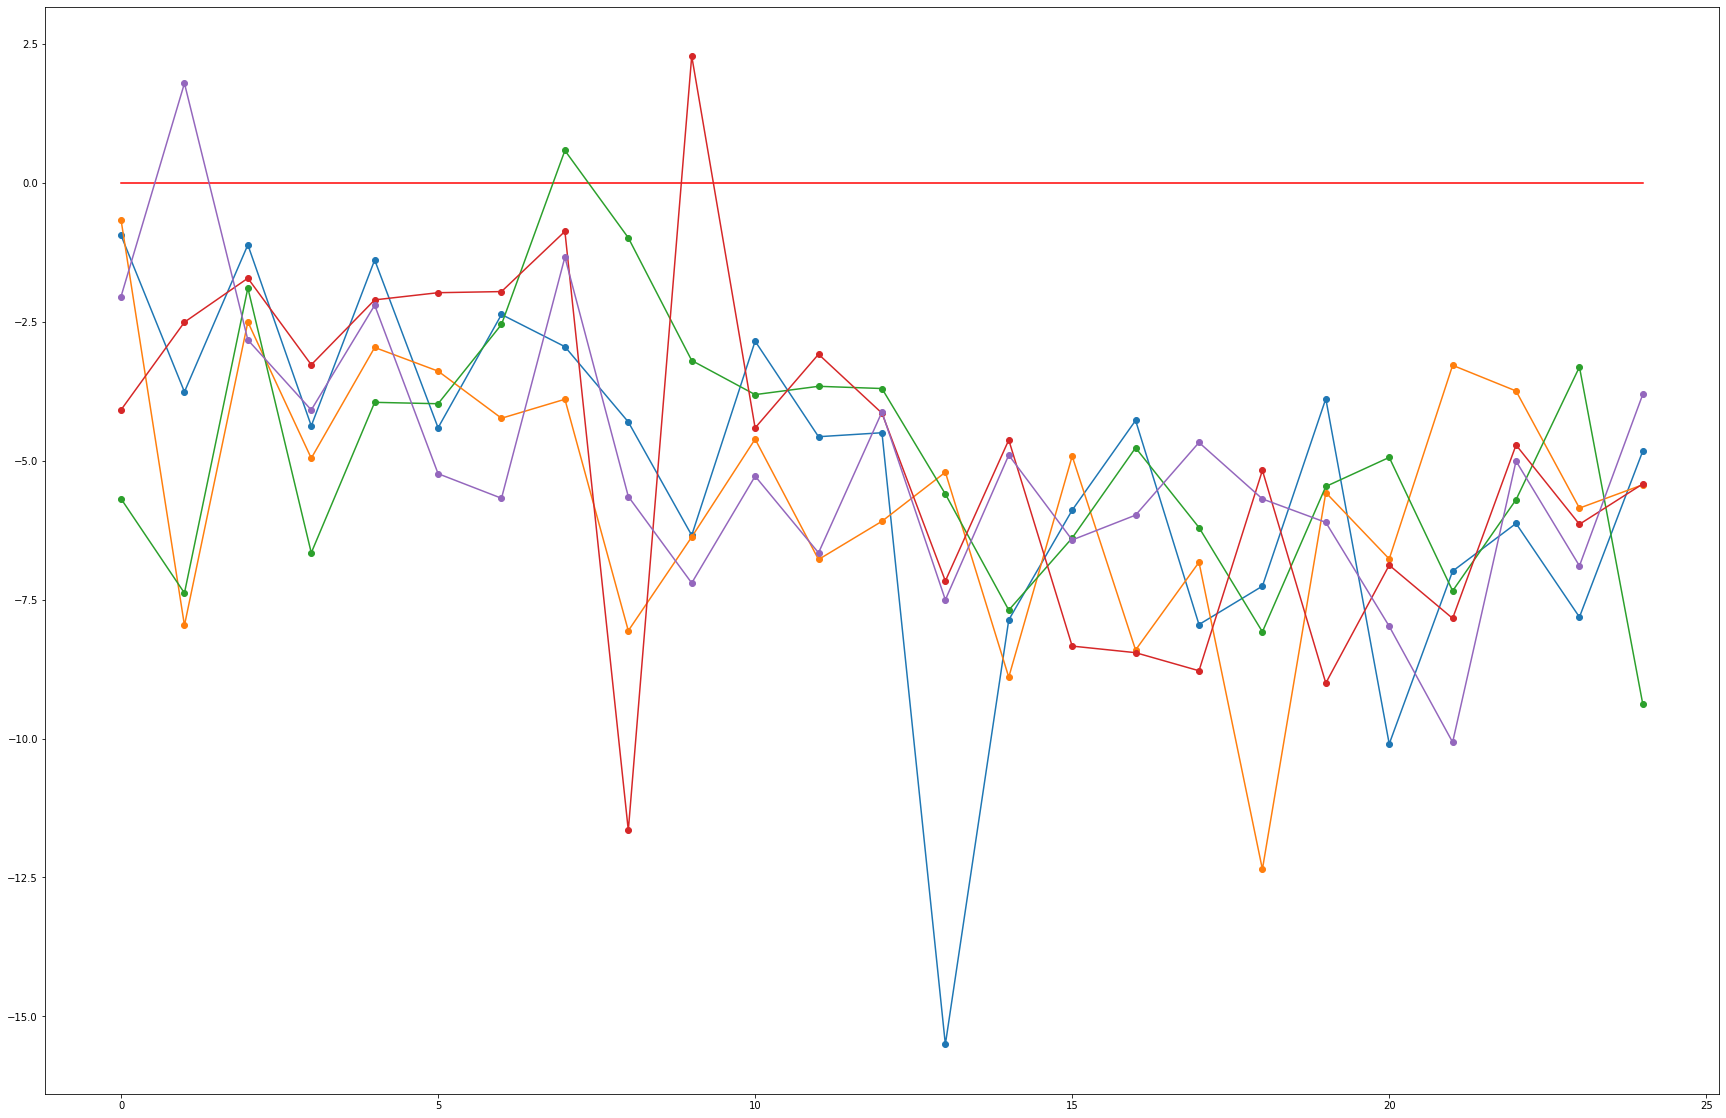

5:F


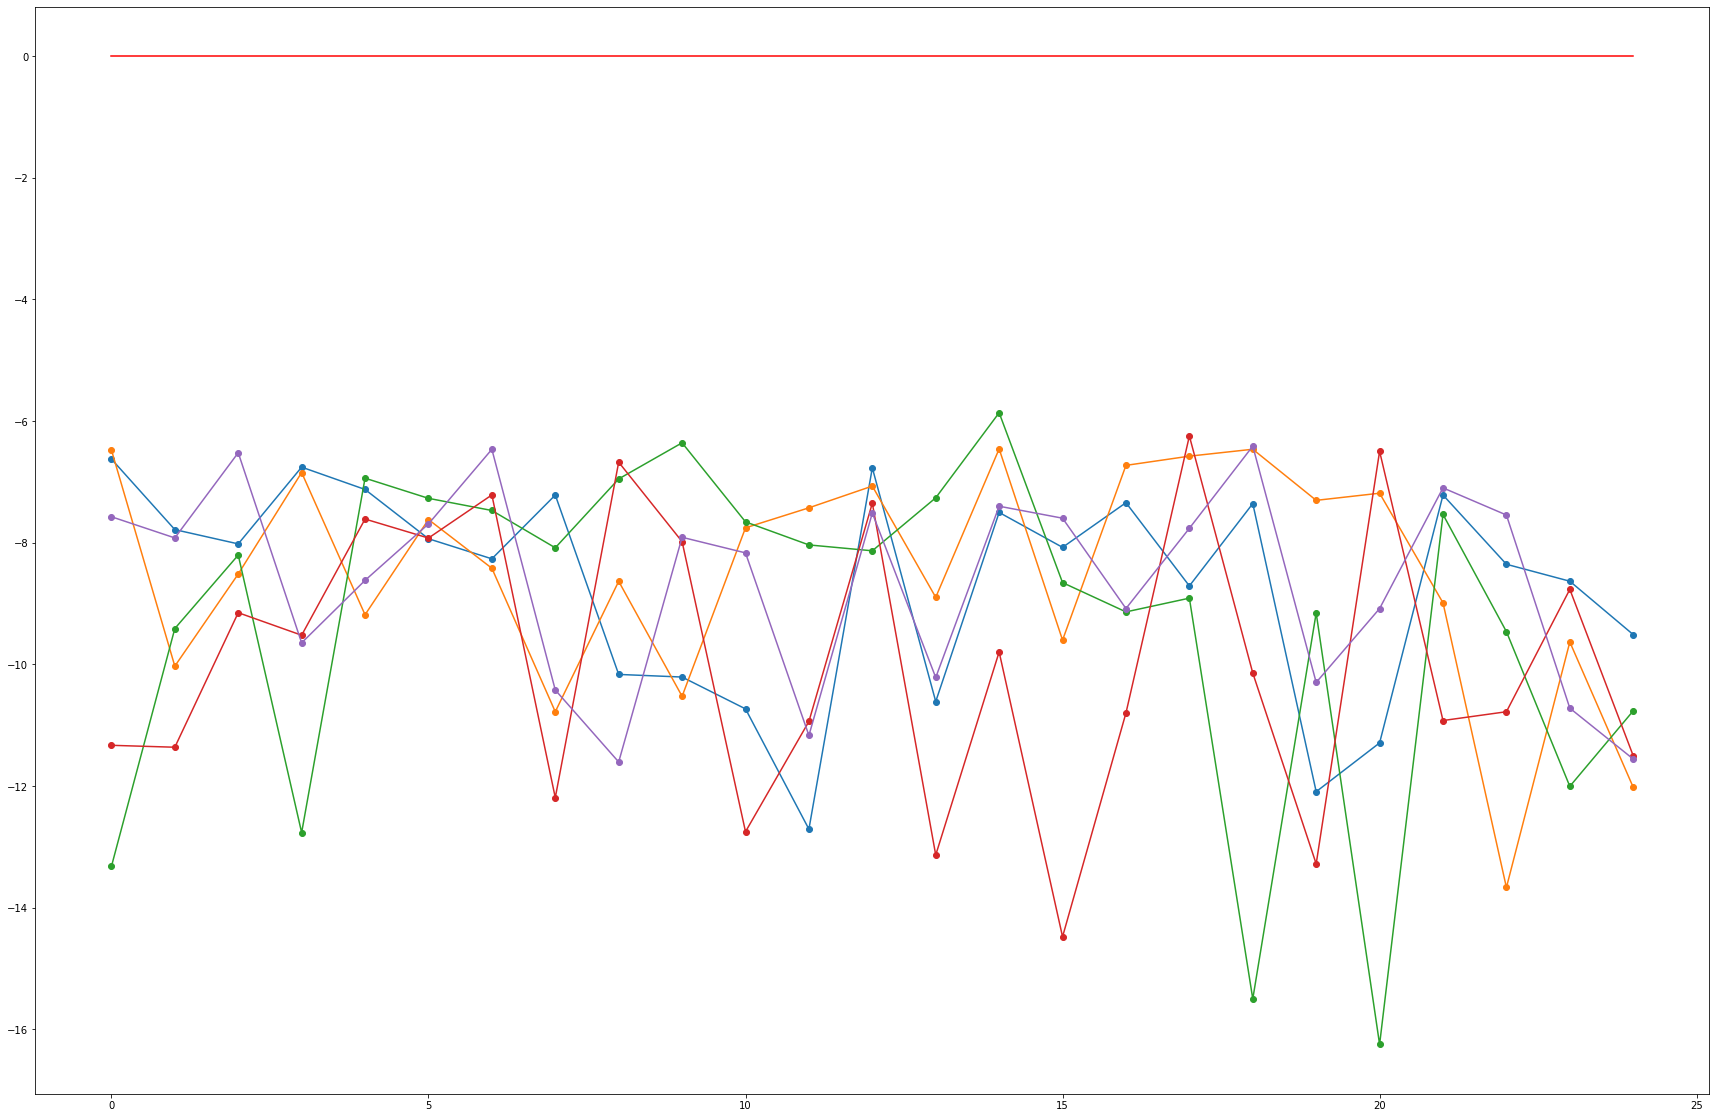

In [10]:
for i in range(6):
    print(str(i)+":"+funcs[i])
    pl.plot_generates_log(TUR_log["rhs."+str(i)]/TUR_log["rhsA(F)."+str(i)],generate_num=generate_num)
    plt.show()

## A/B

0:tflatten(torch.ones(x.shape.cuda(


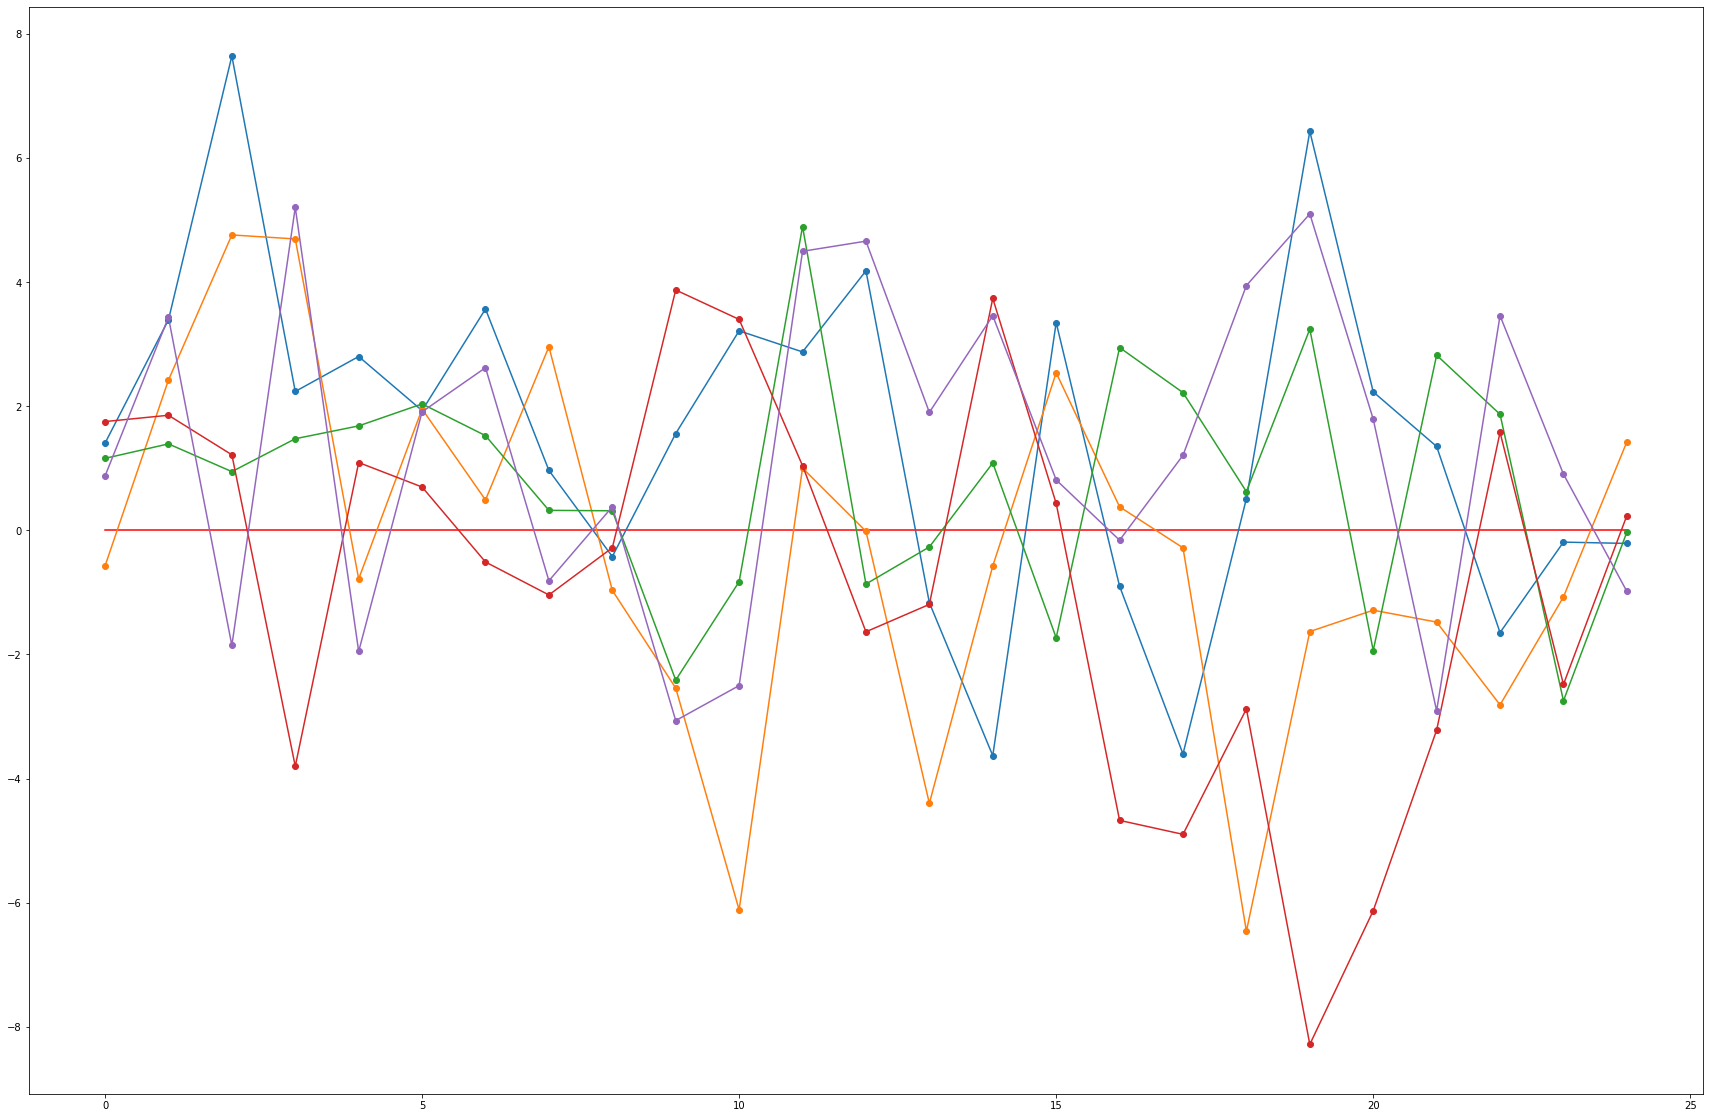

1:xf@


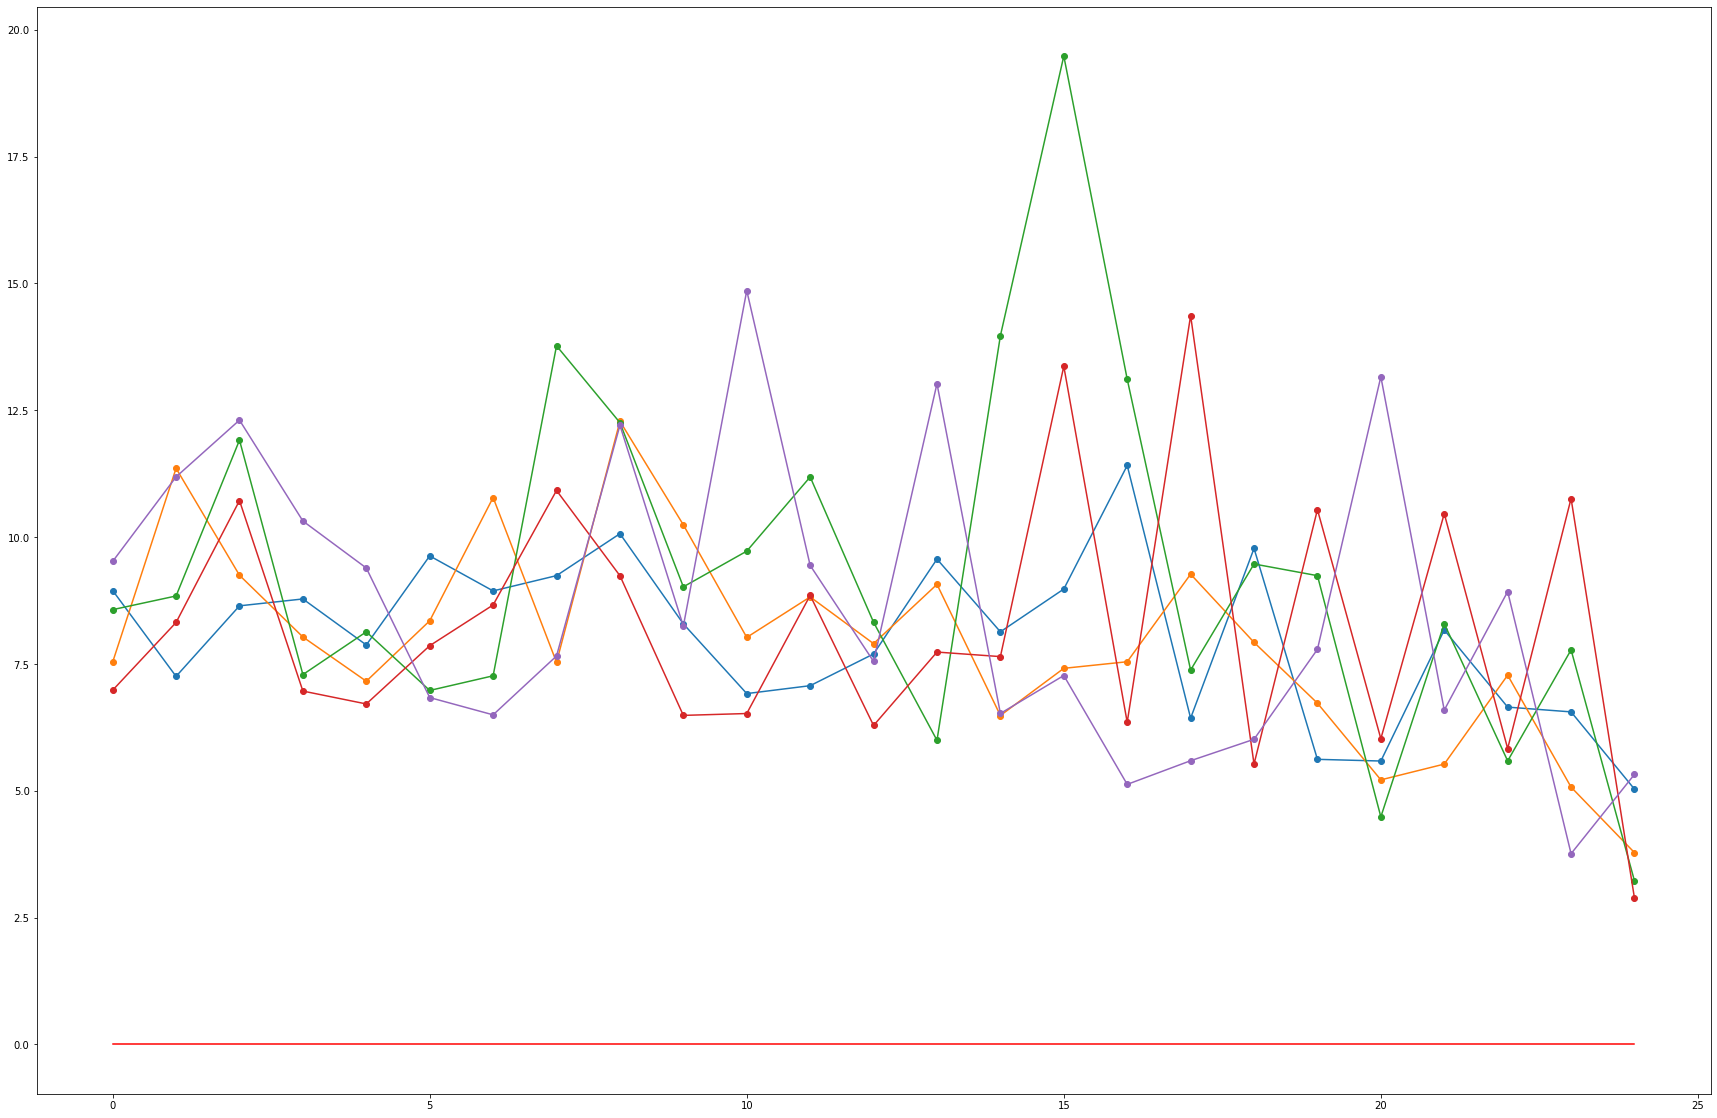

2:-xf2@


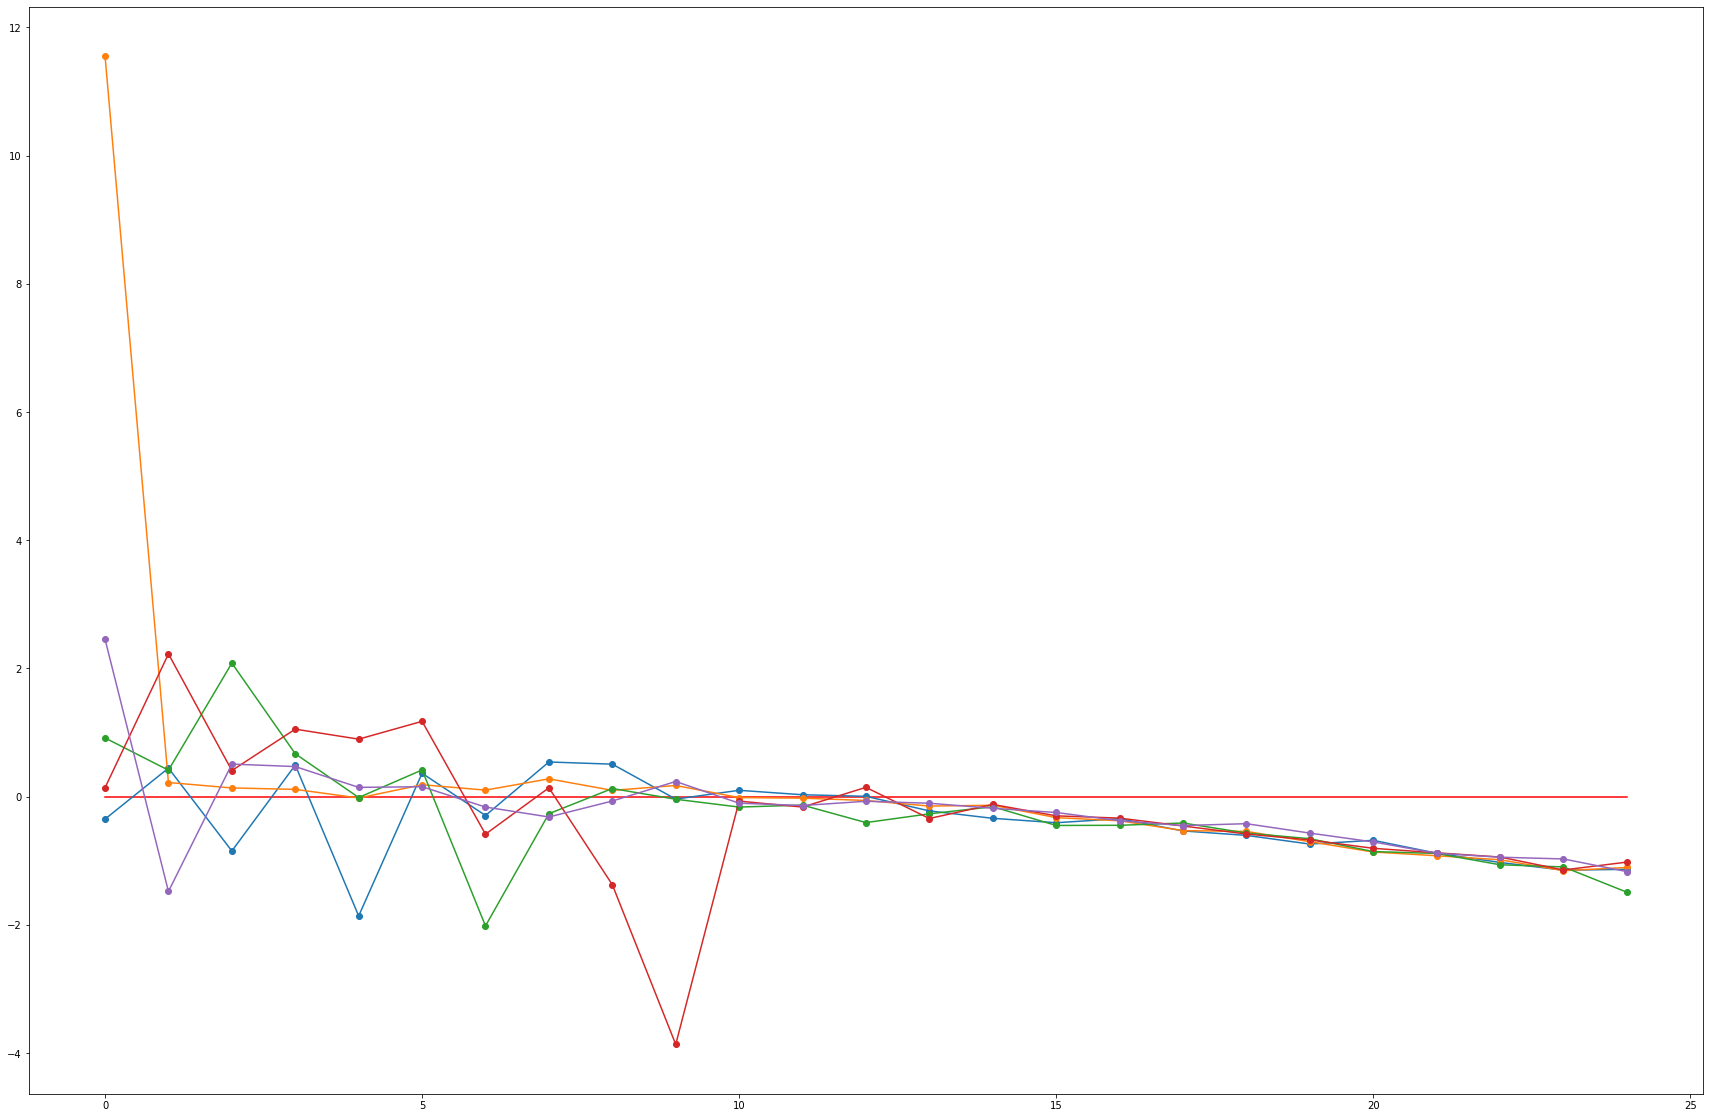

3:x@


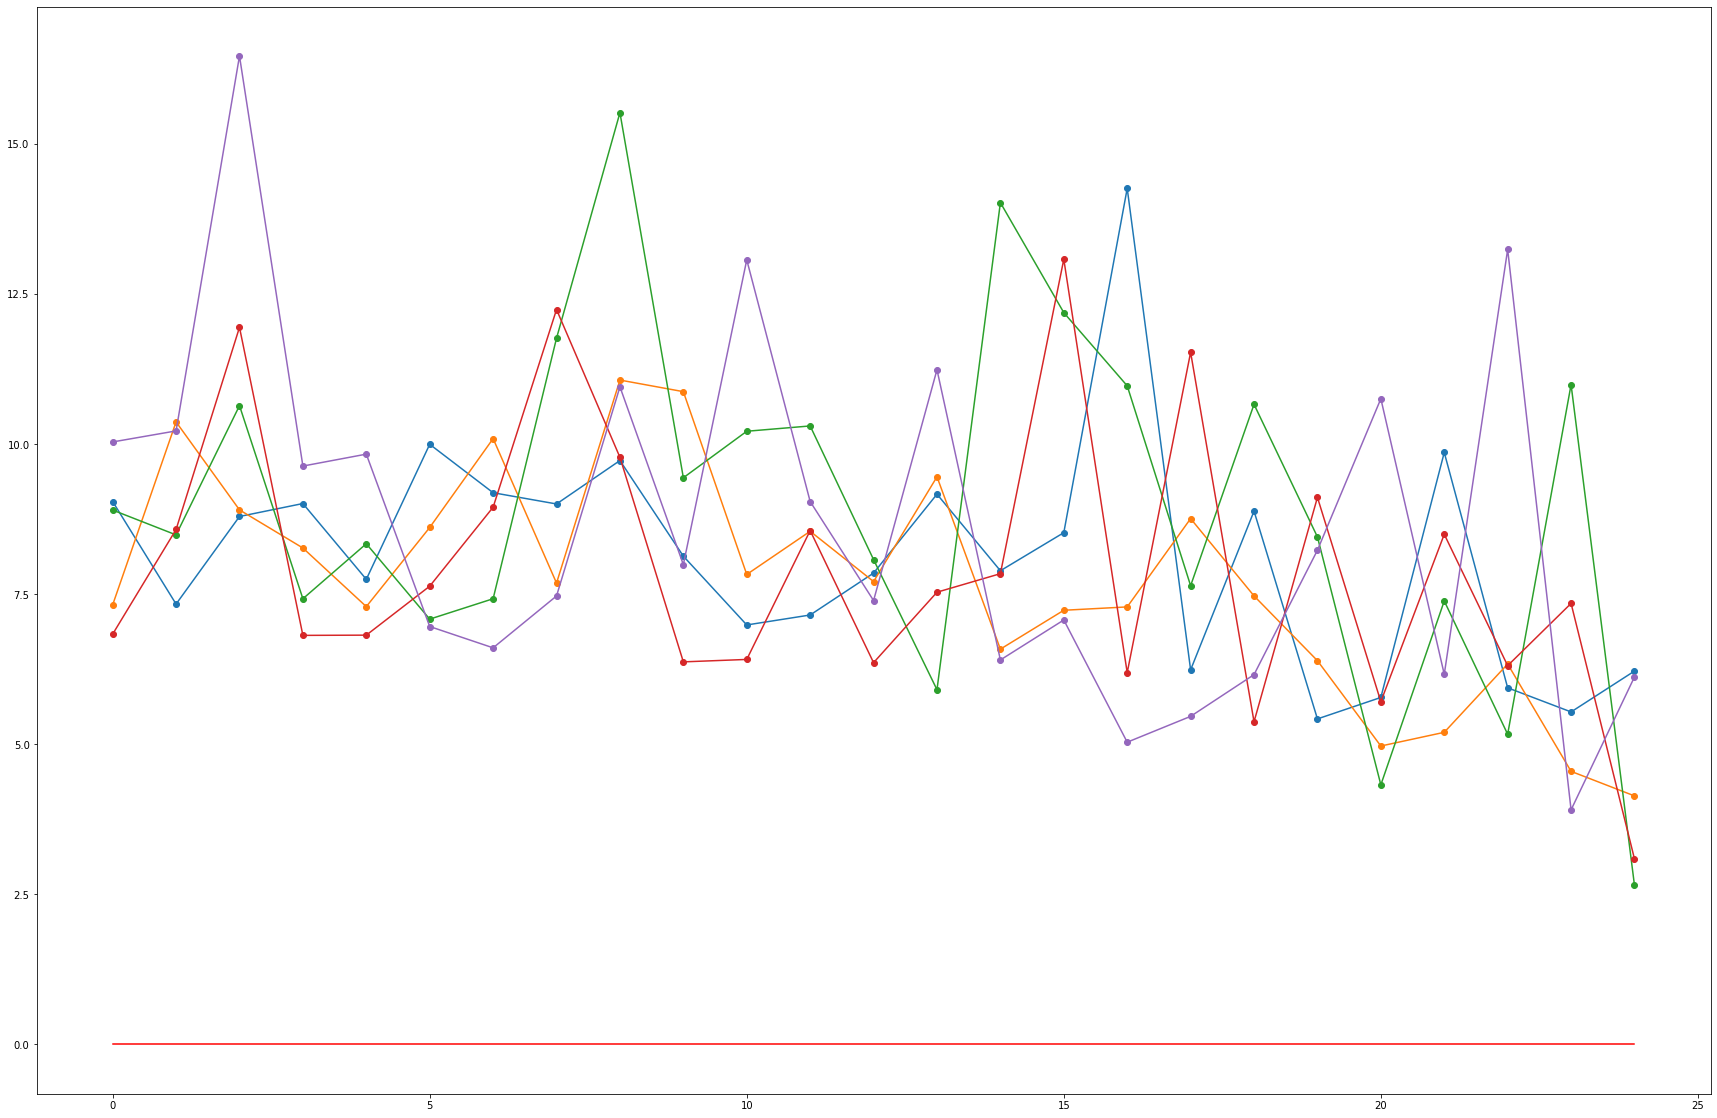

4:x2@


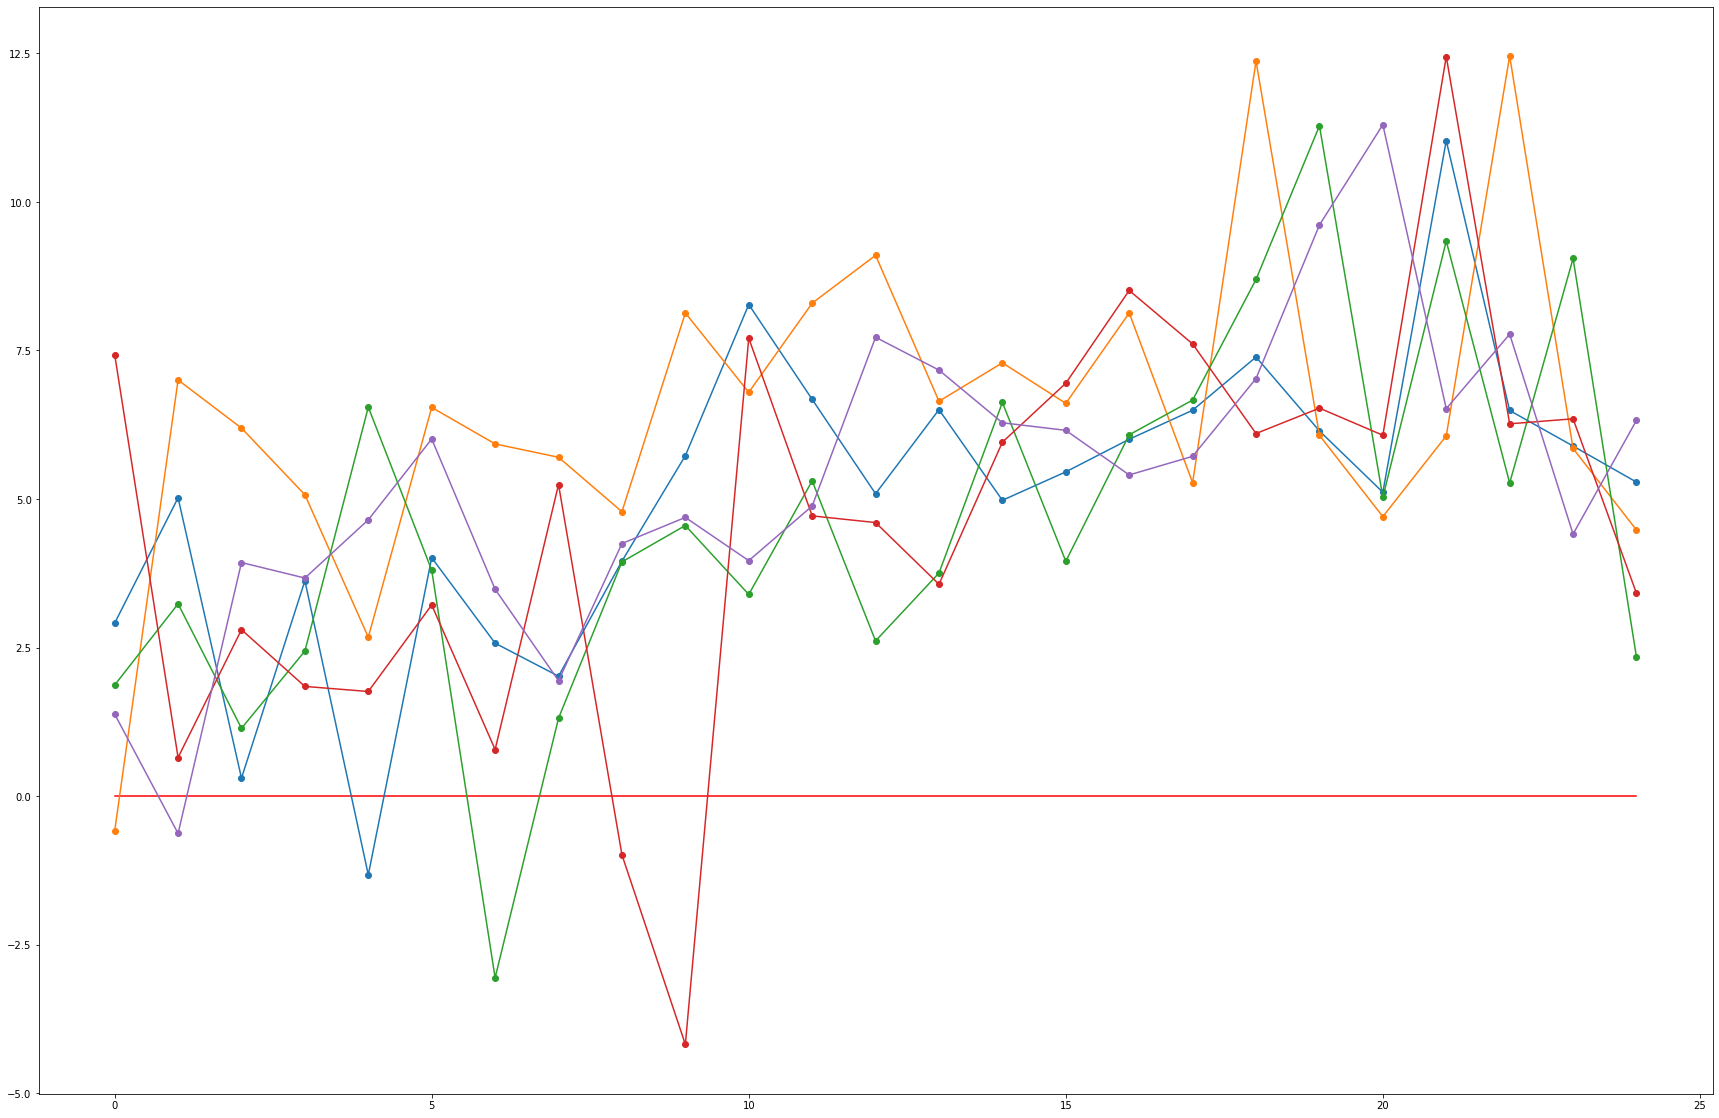

In [12]:
for i in range(5):
    print(str(i)+":"+funcs[i])
    pl.plot_generates_log(TUR_log["rhsA(F)."+str(i)]/TUR_log["rhsB(df)."+str(i)],generate_num=generate_num)
    plt.show()